# Part I: Load Data

#### Importing all the required libraries

In [265]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd #loaded for visualizing the data

import warnings
warnings.filterwarnings('ignore')

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, v_measure_score, adjusted_rand_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN, AffinityPropagation, SpectralClustering, SpectralCoclustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import MeanShift, estimate_bandwidth
import seaborn as sns

### Load data (code)

In [267]:
data = load_wine()

X = data.data

Y = data.target

### Identifying the Key aspects 

In [268]:
print("The number of samples/instances in the wine data is:\033[1m",len(Y),"\033[0m")

print("The number of dimensions/features/attributes in the dataset is:\033[1m",len(X[0]),"\033[0m")

print("The number of classes in the dataset is:\033[1m",len(data.target_names),"\033[0m")

print("The class names of the data are:\033[1m", ', '.join(data.target_names),"\033[0m")

The number of samples/instances in the wine data is: 178 
The number of dimensions/features/attributes in the dataset is: 13 
The number of classes in the dataset is: 3 
The class names of the data are: class_0, class_1, class_2 


In [269]:
unique_values, count = np.unique(Y, return_counts=True)
print("The number of samples per class:")
print(" class_0 wine has\033[1m", count[0],"\033[0m" "samples", "\n", "class_1 wine has\033[1m", count[1],"\033[0m" "samples", "\n", "class_2 wine has\033[1m", count[2],"\033[0m" "samples")

The number of samples per class:
 class_0 wine has 59 samples 
 class_1 wine has 71 samples 
 class_2 wine has 48 samples


# Part II: Clustering

Clustering Methods Used are:

1) KMeans

2) Agglomerative Clustering 

3) DBSCAN [5]

4) BIRCH [6]

5) Affinity Propagation [7]

6) Mean-Shift [8]

# 1. KMeans Clutering Method

#### Training using KMeans algorithm for 3 clusters

In [270]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [271]:
kmeans = KMeans(n_clusters=3, n_init=100, init='random')

In [272]:
kmeans.fit(x_train, y_train)

KMeans(init='random', n_clusters=3, n_init=100)

In [273]:
predicted_classes = kmeans.predict(x_test)

#### Internal evaluation metrics for KMeans

In [274]:
shc = silhouette_score(x_test, predicted_classes)

chs = calinski_harabasz_score(x_test, predicted_classes)

dbs = davies_bouldin_score(x_test, predicted_classes) 

print("The \033[1m silhouette score of KMeans \033[0m  is:\033[1m", shc,"\033[0m")
print("The \033[1m calinski harabasz score of KMeans \033[0m is:\033[1m", chs,"\033[0m")
print("The \033[1m davies bouldin score of KMeans \033[0m is:\033[1m", dbs,"\033[0m")

The  silhouette score of KMeans   is: 0.5698497328652201 
The  calinski harabasz score of KMeans  is: 102.28143693890466 
The  davies bouldin score of KMeans  is: 0.5202402865293374 


#### External evaluation metrics  for KMeans

In [275]:
vms = v_measure_score(y_test, predicted_classes)
ars = adjusted_rand_score(y_test, predicted_classes)

print("The \033[1mv measure score of KMeans \033[0m is:\033[1m", vms,"\033[0m")
print("The \033[1madjusted rand score of KMeans \033[0m is:\033[1m", ars,"\033[0m")

The v measure score of KMeans  is: 0.5365783935489853 
The adjusted rand score of KMeans  is: 0.4927536231884058 


#### Let's try to visualize the clusters and assess the performance of the algorithm

In [276]:
wine = pd.DataFrame(X)
wine.columns = data.feature_names
wine['classes'] = Y
wine.shape

(178, 14)

## The heatmap, shows the correlation between all the features

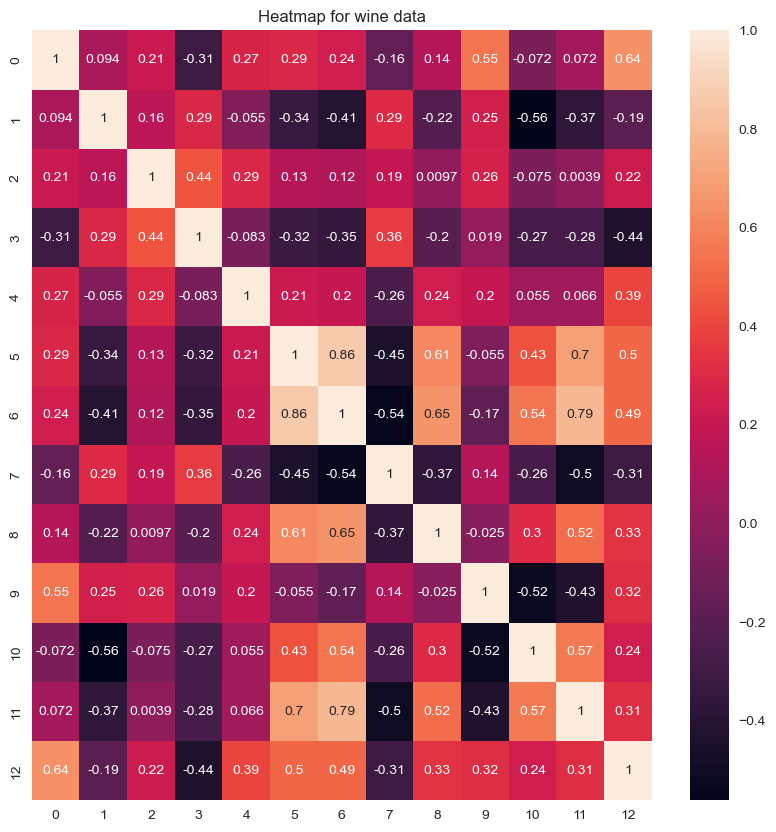

In [277]:
plt.figure(figsize=(10,10))
wine_data = pd.DataFrame(X)
wine_data_corr = wine_data.corr()
sns.heatmap(wine_data_corr, annot=True)
plt.title('Heatmap for wine data')
plt.show()

Text(0.5, 1.0, 'KMeans Clustering Method')

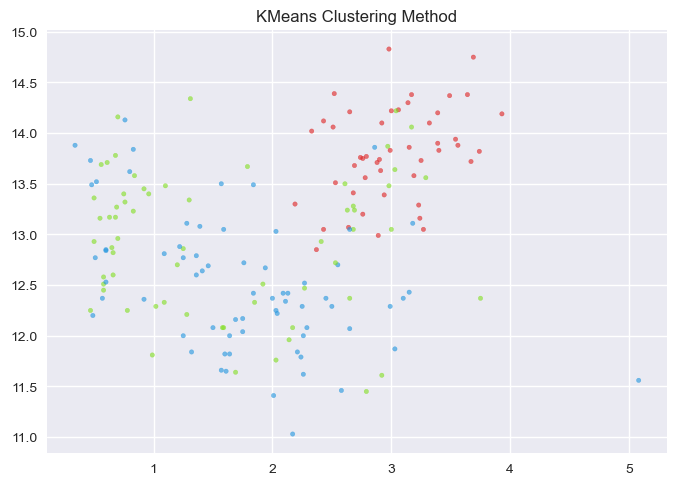

In [278]:
# [4]
wine['cluster'] = kmeans.fit_predict(X, Y)
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
wine['cen_x'] = wine.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
wine['cen_y'] = wine.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
wine['c'] = wine.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(wine['flavanoids'], wine['alcohol'], c=wine.c, alpha = 0.6, s=10)
plt.title("KMeans Clustering Method")

#### Let's use PCA and decrease the dimensionality of the data to 7 dimensions from 13 dimensions

In [279]:
pca = PCA(n_components=7)
x_pca = pca.fit_transform(X)

In [280]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, Y, test_size=0.2, random_state=42)

In [281]:
kmeans_pca = KMeans(n_clusters=3, n_init=100, init='random')

In [282]:
kmeans_pca.fit(x_train, y_train)

KMeans(init='random', n_clusters=3, n_init=100)

In [283]:
y_pred_kmeans_pca = kmeans_pca.predict(x_test)

#### Internal Evaluation metrics

In [284]:
shc = silhouette_score(x_test, y_test)

chs = calinski_harabasz_score(x_test, y_test)

dbs = davies_bouldin_score(x_test, y_test) 

print("The \033[1m silhouette score of KMeans with PCA \033[0m is:\033[1m", shc,"\033[0m")
print("The \033[1m calinski harabasz score of KMeans with PCA \033[0m is:\033[1m", chs,"\033[0m")
print("The \033[1m davies bouldin score of KMeans with PCA \033[0m is:\033[1m", dbs,"\033[0m")

The  silhouette score of KMeans with PCA  is: 0.23691906958028433 
The  calinski harabasz score of KMeans with PCA  is: 53.417795125668285 
The  davies bouldin score of KMeans with PCA  is: 1.1395026889910211 


#### External evaluation metrics

In [285]:
vms = v_measure_score(y_test, predicted_classes)
ars = adjusted_rand_score(y_test, predicted_classes)

print("The \033[1mv measure score of KMeans with PCA \033[0m is:\033[1m", vms,"\033[0m")
print("The \033[1madjusted rand score of KMeans with PCA  \033[0m is:\033[1m", ars,"\033[0m")

The v measure score of KMeans with PCA  is: 0.5365783935489853 
The adjusted rand score of KMeans with PCA   is: 0.4927536231884058 


In [286]:
wine_pca = pd.DataFrame(x_pca)
wine_pca.columns = ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7']
wine_pca['classes'] = Y
wine_pca.shape

(178, 8)

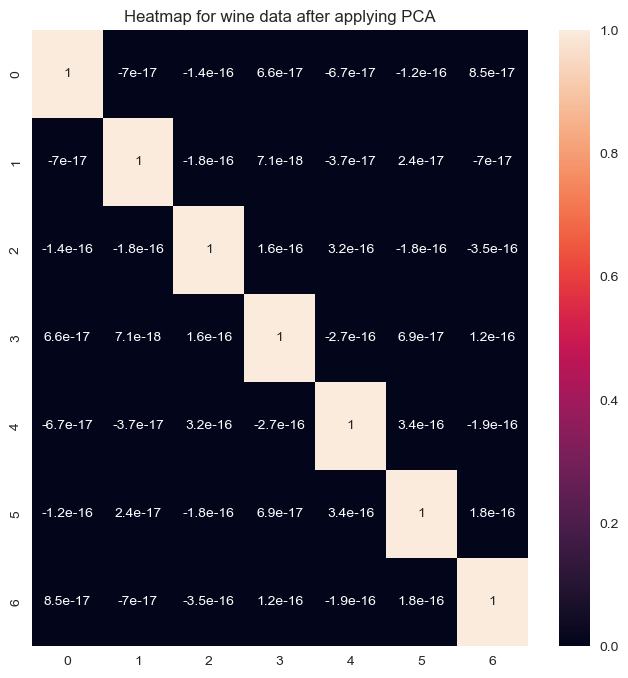

In [287]:
plt.figure(figsize=(8,8))
wine_pca_data = pd.DataFrame(x_pca)
wine_pca_corr = wine_pca_data.corr()
sns.heatmap(wine_pca_corr, annot=True)
plt.title('Heatmap for wine data after applying PCA')
plt.show()

Text(0.5, 1.0, 'KMeans Clustering Method with PCA')

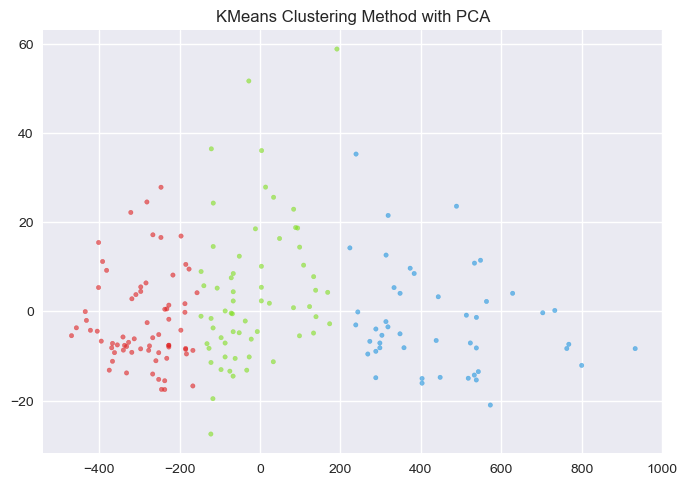

In [288]:
#[4]
wine_pca['cluster'] = kmeans_pca.fit_predict(X, Y)
centroids = kmeans_pca.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
wine_pca['cen_x'] = wine_pca.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
wine_pca['cen_y'] = wine_pca.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
wine_pca['c'] = wine_pca.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(wine_pca['pca_1'], wine_pca['pca_2'], c=wine_pca.c, alpha = 0.6, s=10)
plt.title("KMeans Clustering Method with PCA")

## Let's increase the number of clusters and assess the performance of the same algorithm

In [289]:
kmeans_5clusters = KMeans(n_clusters=5, n_init=100, init='random')

In [290]:
kmeans_5clusters.fit(x_train, y_train)

KMeans(init='random', n_clusters=5, n_init=100)

In [291]:
y_pred_5clusters = kmeans_5clusters.predict(x_test)

#### Internal evaluation metrics

In [292]:
shc = silhouette_score(x_test, y_pred_5clusters)

chs = calinski_harabasz_score(x_test, y_pred_5clusters)

dbs = davies_bouldin_score(x_test, y_pred_5clusters) 

print("The \033[1m silhouette score of KMeans wih 5 clusters \033[0m is:\033[1m", shc,"\033[0m")
print("The \033[1m calinski harabasz score of KMeans wih 5 clusters \033[0m is:\033[1m", chs,"\033[0m")
print("The \033[1m davies bouldin score of KMeans wih 5 clusters \033[0m is:\033[1m", dbs,"\033[0m")

The  silhouette score of KMeans wih 5 clusters  is: 0.603774596055664 
The  calinski harabasz score of KMeans wih 5 clusters  is: 156.13047548667868 
The  davies bouldin score of KMeans wih 5 clusters  is: 0.47954292333880844 


In [293]:
wine_pca_5clusters = pd.DataFrame(x_pca)
wine_pca_5clusters.columns = ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7']
wine_pca_5clusters['classes'] = Y
wine_pca_5clusters.shape

(178, 8)

Text(0.5, 1.0, 'KMeans Clustering Method with 5 clusters')

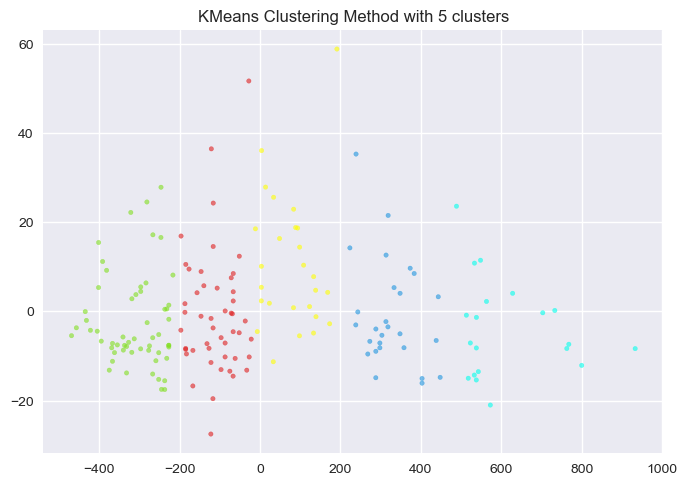

In [294]:
#[4]
wine_pca_5clusters['cluster'] = kmeans_5clusters.fit_predict(X, Y)
centroids = kmeans_5clusters.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
wine_pca_5clusters['cen_x'] = wine_pca_5clusters.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4]})
wine_pca_5clusters['cen_y'] = wine_pca_5clusters.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_x[3], 4:cen_x[4]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#03FFEC', '#FFFF03']
wine_pca_5clusters['c'] = wine_pca_5clusters.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

plt.scatter(wine_pca_5clusters['pca_1'], 
            wine_pca_5clusters['pca_2'], 
            c=wine_pca_5clusters.c, 
            alpha = 0.6, 
            s=10)
plt.title("KMeans Clustering Method with 5 clusters")

# 2. Agglomerative Clustering Method

In [295]:
agc = AgglomerativeClustering(n_clusters=3)

In [296]:
agc.fit(x_train, y_train)

AgglomerativeClustering(n_clusters=3)

In [297]:
y_pred_agc = agc.fit_predict(x_test)

In [298]:
accuracy_score(y_test, y_pred_agc)

0.5277777777777778

#### Internal Evaluation Metrics for Agglomerative Custering

In [299]:
shc = silhouette_score(x_test, y_test)

chs = calinski_harabasz_score(x_test, y_test)

dbs = davies_bouldin_score(x_test, y_test) 

print("The \033[1m silhouette score of Agglomerative Clustering \033[0m is:\033[1m", shc,"\033[0m")
print("The \033[1m calinski harabasz score of Agglomerative Clustering \033[0m is:\033[1m", chs,"\033[0m")
print("The \033[1m davies bouldin score of Agglomerative Clustering \033[0m is:\033[1m", dbs,"\033[0m")

The  silhouette score of Agglomerative Clustering  is: 0.23691906958028433 
The  calinski harabasz score of Agglomerative Clustering  is: 53.417795125668285 
The  davies bouldin score of Agglomerative Clustering  is: 1.1395026889910211 


#### External Evaluation Metrics for Agglomerative Custering

In [300]:
vms = v_measure_score(y_test, y_pred_agc)
ars = adjusted_rand_score(y_test, y_pred_agc)

print("The \033[1mv measure score of Agglomerative Clustering \033[0m is:\033[1m", vms,"\033[0m")
print("The \033[1madjusted rand score of Agglomerative Clustering  \033[0m is:\033[1m", ars,"\033[0m")

The v measure score of Agglomerative Clustering  is: 0.5157977648795584 
The adjusted rand score of Agglomerative Clustering   is: 0.45355850422195415 


In [301]:
wine = pd.DataFrame(X)
wine.columns = data.feature_names
wine['classes'] = Y
wine.shape

(178, 14)

In [302]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,classes
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [303]:
agc.labels_

array([1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 2,
       1, 1, 2, 1, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Agglomerative Clustering Method')

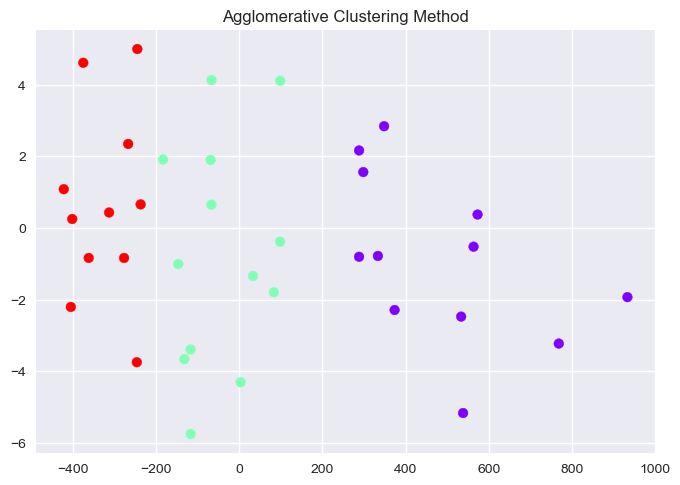

In [304]:
#[3]
plt.scatter(x=x_test[:,0], y=x_test[:,2], c = agc.labels_, cmap='rainbow')
plt.title("Agglomerative Clustering Method")

#### Agglomerative clustering with PCA and Standard Scaler

In [305]:
sclr = StandardScaler()
pca = PCA(n_components=7)

In [306]:
x_pca = pca.fit_transform(sclr.fit_transform(X))

In [307]:
y_pred_agc_scle_pca = agc.fit_predict(x_pca,Y)

#### Internal Evaluation Metrics for Agglomerative Clustering with PCA and Standard Scaler

In [308]:
shc = silhouette_score(x_pca, y_pred_agc_scle_pca)

chs = calinski_harabasz_score(x_pca, y_pred_agc_scle_pca)

dbs = davies_bouldin_score(x_pca, y_pred_agc_scle_pca) 

print("The \033[1m silhouette score of Agglomerative Clustering with PCA and Standard Scaler \033[0m is:\033[1m", shc,"\033[0m")
print("The \033[1m calinski harabasz score of Agglomerative Clustering with PCA and Standard Scaler \033[0m is:\033[1m", chs,"\033[0m")
print("The \033[1m davies bouldin score of Agglomerative Clustering with PCA and Standard Scaler \033[0m is:\033[1m", dbs,"\033[0m")

The  silhouette score of Agglomerative Clustering with PCA and Standard Scaler  is: 0.30874273928315893 
The  calinski harabasz score of Agglomerative Clustering with PCA and Standard Scaler  is: 81.42337491844717 
The  davies bouldin score of Agglomerative Clustering with PCA and Standard Scaler  is: 1.2531223471706436 


In [309]:
accuracy_score(Y, y_pred_agc_scle_pca)

0.29775280898876405

#### External Evaluation Metrics for Agglomerative Clustering with PCA and Standard Scaler

In [310]:
vms = v_measure_score(Y, y_pred_agc_scle_pca)
ars = adjusted_rand_score(Y, y_pred_agc_scle_pca)

print("The \033[1mv measure score of Agglomerative Clustering with PCA and Standard Scaler \033[0m is:\033[1m", vms,"\033[0m")
print("The \033[1madjusted rand score of Agglomerative Clustering with PCA and Standard Scaler \033[0m is:\033[1m", ars,"\033[0m")

The v measure score of Agglomerative Clustering with PCA and Standard Scaler  is: 0.7518426313859891 
The adjusted rand score of Agglomerative Clustering with PCA and Standard Scaler  is: 0.7718410789332827 


In [311]:
wine = pd.DataFrame(x_pca)
wine.columns = ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7']
wine['classes'] = Y
wine.shape

(178, 8)

Text(0.5, 1.0, 'Agglomerative Clustering Method with PCA and Standard Scaler')

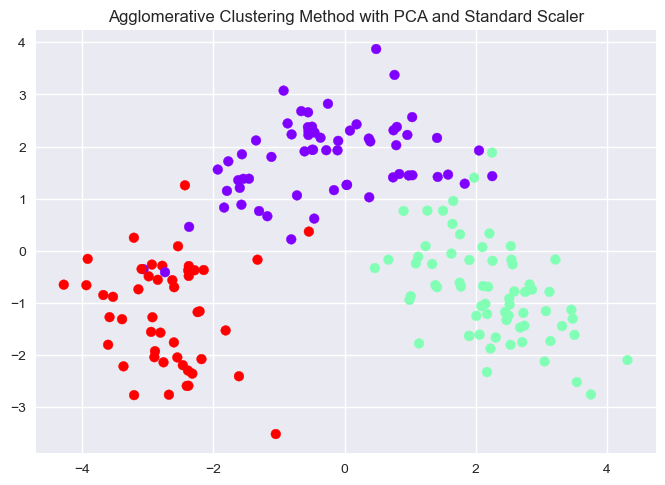

In [312]:
#[3]
plt.scatter(x=wine['pca_1'], y=wine['pca_2'], c = agc.labels_, cmap='rainbow')
plt.title("Agglomerative Clustering Method with PCA and Standard Scaler")

#### Let's increase the number of clusters to 5 to assess the performance

In [313]:
sclr = StandardScaler()
pca = PCA(n_components=7)

In [314]:
x_pca = pca.fit_transform(sclr.fit_transform(X))

In [315]:
agc_5clusters = AgglomerativeClustering(n_clusters=5)

In [316]:
y_pred_5clusters_pca_sclr = agc_5clusters.fit_predict(x_pca, Y)

In [317]:
accuracy_score(Y, y_pred_5clusters_pca_sclr)

0.7415730337078652

#### Internal Evaluation Metrics for Agglomerative Clustering with 5 clusters

In [318]:
shc = silhouette_score(x_pca, y_pred_5clusters_pca_sclr)

chs = calinski_harabasz_score(x_pca, y_pred_5clusters_pca_sclr)

dbs = davies_bouldin_score(x_pca, y_pred_agc_scle_pca) 

print("The \033[1m silhouette score of Agglomerative wih 5 clusters \033[0m is:\033[1m", shc,"\033[0m")
print("The \033[1m calinski harabasz score of Agglomerative wih 5 clusters \033[0m is:\033[1m", chs,"\033[0m")
print("The \033[1m davies bouldin score of Agglomerative wih 5 clusters \033[0m is:\033[1m", dbs,"\033[0m")

The  silhouette score of Agglomerative wih 5 clusters  is: 0.19947797979753834 
The  calinski harabasz score of Agglomerative wih 5 clusters  is: 54.54199506613617 
The  davies bouldin score of Agglomerative wih 5 clusters  is: 1.2531223471706436 


In [319]:
wine = pd.DataFrame(x_pca)
wine.columns = ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7']
wine['classes'] = Y
wine.shape

(178, 8)

Text(0.5, 1.0, 'Agglomerative Clustering Method with 5 clusters')

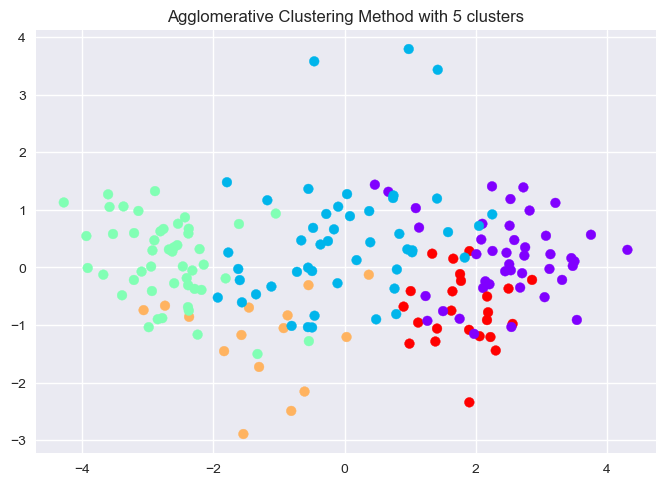

In [320]:
# [3]
plt.scatter(x=wine['pca_1'], y=wine['pca_4'], c = agc_5clusters.labels_, cmap='rainbow')
plt.title("Agglomerative Clustering Method with 5 clusters")

# 3. DBSCAN Clustering Method [5]

In [321]:
dbscan=DBSCAN(eps=40,min_samples=13)
y_pred_dbscan = dbscan.fit_predict(X)

#### Internal Evaluation Metrics for DBSCAN

In [322]:
shc = silhouette_score(X, y_pred_dbscan)

chs = calinski_harabasz_score(X, y_pred_dbscan)

dbs = davies_bouldin_score(X, y_pred_dbscan) 

print("The \033[1m silhouette score of DBSCAN Clustering \033[0m is:\033[1m", shc,"\033[0m")
print("The \033[1m calinski harabasz score of DBSCAN Clustering \033[0m is:\033[1m", chs,"\033[0m")
print("The \033[1m davies bouldin score of DBSCAN Clustering \033[0m is:\033[1m", dbs,"\033[0m")

The  silhouette score of DBSCAN Clustering  is: 0.4131010483149045 
The  calinski harabasz score of DBSCAN Clustering  is: 178.17422851755185 
The  davies bouldin score of DBSCAN Clustering  is: 4.167135382259382 


#### Extenal Evaluation Metrics for DBSCAN

In [323]:
vms = v_measure_score(Y, y_pred_dbscan)
ars = adjusted_rand_score(Y, y_pred_dbscan)

print("The \033[1mv measure score of DBSCAN Clustering \033[0m is:\033[1m", vms,"\033[0m")
print("The \033[1madjusted rand score of DBSCAN Clustering  \033[0m is:\033[1m", ars,"\033[0m")

The v measure score of DBSCAN Clustering  is: 0.3841182539606525 
The adjusted rand score of DBSCAN Clustering   is: 0.3269014234534921 


In [324]:
wine = pd.DataFrame(X)
wine.columns = data.feature_names
wine['classes'] = Y
wine.shape

(178, 14)

Text(0.5, 1.0, 'DBSCAN Clustering Method')

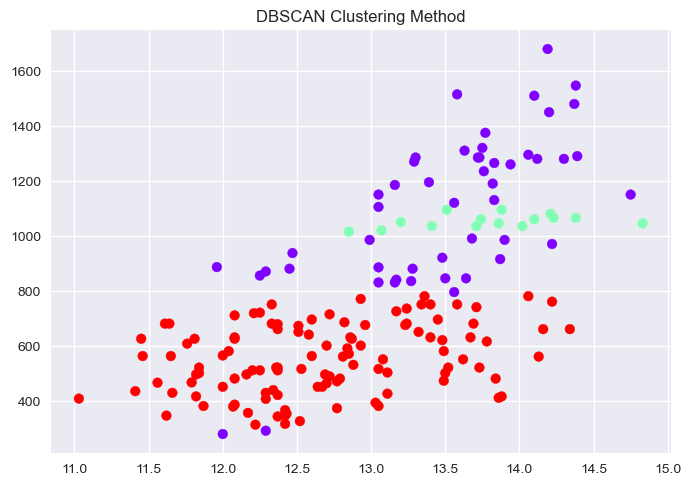

In [325]:
# [3]
plt.scatter(x=wine['alcohol'], y=wine['proline'], c = dbscan.labels_, cmap='rainbow')
plt.title("DBSCAN Clustering Method")

#### DBSCAN with Standard Scaler and TSNE

In [326]:
sclr = StandardScaler()
tsne = TSNE(n_components=5, method='exact')

x_tsne = tsne.fit_transform(sclr.fit_transform(X))

dbscan_tsne=DBSCAN(eps=178,min_samples=13)
y_pred_dbscan_tsne = dbscan_tsne.fit_predict(x_tsne)

#### Internal Evaluation Metrics for DBSCAN with Stnadard Scaler and TSNE

In [327]:
shc = silhouette_score(X, y_pred_dbscan_tsne)

chs = calinski_harabasz_score(X, y_pred_dbscan_tsne)

dbs = davies_bouldin_score(X, y_pred_dbscan_tsne) 

print("The \033[1m silhouette score of DBSCAN with Standard Scaler and TSNE \033[0m is:\033[1m", shc,"\033[0m")
print("The \033[1m calinski harabasz score of DBSCAN with Standard Scaler and TSNE \033[0m is:\033[1m", chs,"\033[0m")
print("The \033[1m davies bouldin score of DBSCAN with Standard Scaler and TSNE \033[0m is:\033[1m", dbs,"\033[0m")

The  silhouette score of DBSCAN with Standard Scaler and TSNE  is: -0.12934132684947203 
The  calinski harabasz score of DBSCAN with Standard Scaler and TSNE  is: 0.024214668035690636 
The  davies bouldin score of DBSCAN with Standard Scaler and TSNE  is: 16.579548290636957 


#### External Evaluation Metrics for DBSCAN with Stnadard Scaler and TSNE

In [328]:
vms = v_measure_score(Y, y_pred_dbscan)
ars = adjusted_rand_score(Y, y_pred_dbscan)

print("The \033[1mv measure score of DBSCAN with Standard Scaler and TSNE \033[0m is:\033[1m", vms,"\033[0m")
print("The \033[1madjusted rand score of DBSCAN with Standard Scaler and TSNE  \033[0m is:\033[1m", ars,"\033[0m")

The v measure score of DBSCAN with Standard Scaler and TSNE  is: 0.3841182539606525 
The adjusted rand score of DBSCAN with Standard Scaler and TSNE   is: 0.3269014234534921 


In [329]:
wine = pd.DataFrame(x_tsne)
wine.columns = ['tsne_1', 'tsne_2', 'tsne_3', 'tsne_4', 'tsne_5']
wine['classes'] = Y
wine.shape

(178, 6)

Text(0.5, 1.0, 'DBSCAN Clustering Method with PCA and TSNE')

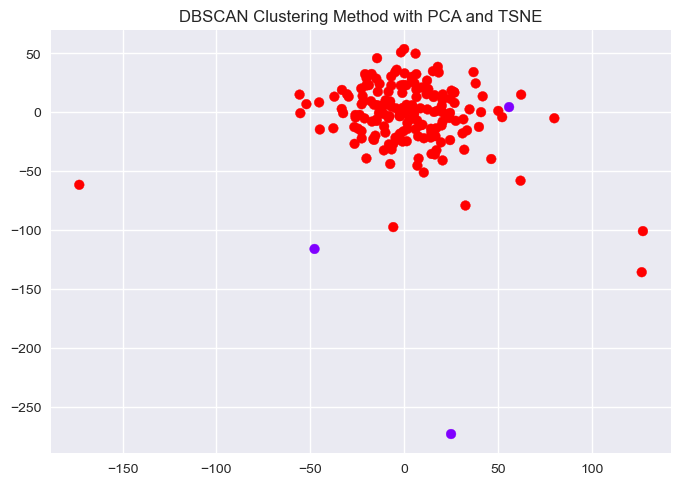

In [330]:
# [3]
plt.scatter(x=wine['tsne_1'], y=wine['tsne_2'], c = dbscan_tsne.labels_, cmap='rainbow')
plt.title("DBSCAN Clustering Method with PCA and TSNE")

# 4. BIRCH Clustering Method [6]

In [331]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [332]:
bch = Birch(n_clusters=3)

In [333]:
bch.fit(x_train,y_train)

Birch()

In [334]:
y_pred_bch = bch.predict(x_test)

#### Internal Evaluation Metrics for BIRCH

In [335]:
shc = silhouette_score(x_test, y_pred_bch)

chs = calinski_harabasz_score(x_test, y_pred_bch)

dbs = davies_bouldin_score(x_test, y_pred_bch)

print("The \033[1m silhouette score of BIRCH Clustering \033[0m is:\033[1m", shc,"\033[0m")
print("The \033[1m calinski harabasz score of BIRCH Clustering \033[0m is:\033[1m", chs,"\033[0m")
print("The \033[1m davies bouldin score of BIRCH Clustering \033[0m is:\033[1m", dbs,"\033[0m")

The  silhouette score of BIRCH Clustering  is: 0.5334632414925647 
The  calinski harabasz score of BIRCH Clustering  is: 94.05241922023522 
The  davies bouldin score of BIRCH Clustering  is: 0.5866562445301988 


#### External Evaluation Metrics for BIRCH

In [336]:
vms = v_measure_score(y_test, y_pred_bch)
ars = adjusted_rand_score(y_test, y_pred_bch)

print("The \033[1mv measure score of BIRCH Clustering \033[0m is:\033[1m", vms,"\033[0m")
print("The \033[1madjusted rand score of BIRCH Clustering  \033[0m is:\033[1m", ars,"\033[0m")

The v measure score of BIRCH Clustering  is: 0.6029711140174827 
The adjusted rand score of BIRCH Clustering   is: 0.4566929133858268 


In [337]:
wine_bch = pd.DataFrame(X)
wine_bch.columns = data.feature_names
wine_bch['classes'] = Y
wine_bch.shape

(178, 14)

Text(0.5, 1.0, 'BRICH Clustering Method')

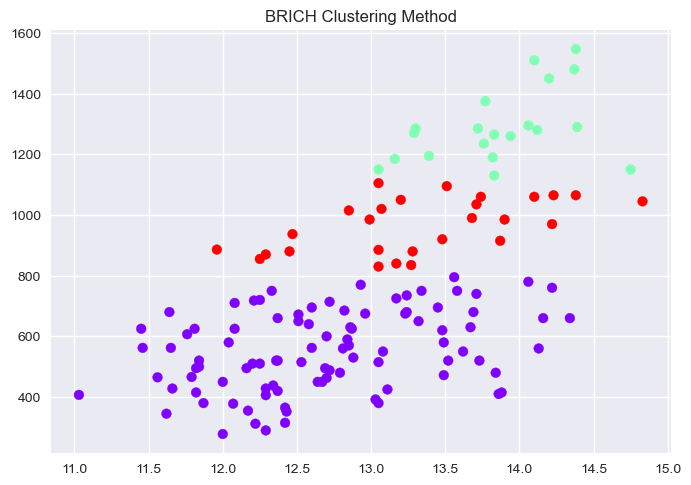

In [338]:
# [3]
plt.scatter(x=x_train[:,0], y=x_train[:,12], c = bch.labels_, cmap='rainbow')
plt.title("BRICH Clustering Method")

#### BIRCH with Standard scaler and PCA

In [339]:
sclr = StandardScaler()
pca = PCA(n_components=7)

In [340]:
x_pca = pca.fit_transform(sclr.fit_transform(X))

In [341]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, Y, test_size=0.2, random_state=42)

In [342]:
bch = Birch(n_clusters=3)

In [343]:
bch.fit(x_train,y_train)

Birch()

In [344]:
y_pred_bch_pca_sclr = bch.predict(x_test)

#### Internal Evaluation Metrics for BIRCH with Standard Scaler and PCA

In [345]:
shc = silhouette_score(x_test, y_pred_bch_pca_sclr)

chs = calinski_harabasz_score(x_test, y_pred_bch_pca_sclr)

dbs = davies_bouldin_score(x_test, y_pred_bch_pca_sclr)

print("The \033[1m silhouette score of BIRCH with Standard Scaler and PCA \033[0m is:\033[1m", shc,"\033[0m")
print("The \033[1m calinski harabasz score of BIRCH with Standard Scaler and PCA \033[0m is:\033[1m", chs,"\033[0m")
print("The \033[1m davies bouldin score of BIRCH with Standard Scaler and PCA \033[0m is:\033[1m", dbs,"\033[0m")

The  silhouette score of BIRCH with Standard Scaler and PCA  is: 0.37265786008711865 
The  calinski harabasz score of BIRCH with Standard Scaler and PCA  is: 23.00445039465537 
The  davies bouldin score of BIRCH with Standard Scaler and PCA  is: 1.0117866290118738 


#### External Evaluation Metrics for BIRCH with Standard Scaler and PCA 

In [346]:
vms = v_measure_score(y_test, y_pred_bch_pca_sclr)
ars = adjusted_rand_score(y_test, y_pred_bch_pca_sclr)

print("The \033[1mv measure score of BIRCH with Standard Scaler and PCA \033[0m is:\033[1m", vms,"\033[0m")
print("The \033[1madjusted rand score of BIRCH with Standard Scaler and PCA  \033[0m is:\033[1m", ars,"\033[0m")

The v measure score of BIRCH with Standard Scaler and PCA  is: 0.8195750057686682 
The adjusted rand score of BIRCH with Standard Scaler and PCA   is: 0.8315412186379928 


In [347]:
wine_bch = pd.DataFrame(x_pca)
wine_bch.columns = ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7']
wine_bch['classes'] = Y
wine_bch.shape

(178, 8)

Text(0.5, 1.0, 'BIRCH Clustering Method with PCA and Standard Scaler [3]')

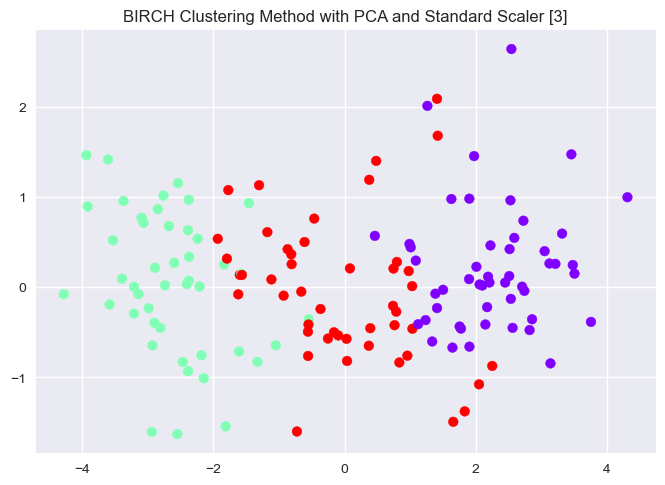

In [348]:
plt.scatter(x=x_train[:,0], y=x_train[:,6], c = bch.labels_, cmap='rainbow')
plt.title("BIRCH Clustering Method with PCA and Standard Scaler [3]")

# 5. Affinity Propagation Clustering Method [7]

In [349]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [350]:
afp = AffinityPropagation(damping=0.89,random_state=3)

In [351]:
afp.fit(x_train, y_train)

AffinityPropagation(damping=0.89, random_state=3)

In [352]:
y_pred_afp = afp.predict(x_test)

#### Internal Evaluation Metrics for Affinity Propogation Clustering

In [353]:
shc = silhouette_score(x_test,y_pred_afp)

chs = calinski_harabasz_score(x_test, y_pred_afp)

dbs = davies_bouldin_score(x_test, y_pred_afp) 

print("The \033[1m silhouette score of Affinity Propogation Clustering \033[0m is:\033[1m", shc,"\033[0m")
print("The \033[1m calinski harabasz score of Affinity Propogation Clustering \033[0m is:\033[1m", chs,"\033[0m")
print("The \033[1m davies bouldin score of Affinity Propogation Clustering \033[0m is:\033[1m", dbs,"\033[0m")

The  silhouette score of Affinity Propogation Clustering  is: 0.6358074966565659 
The  calinski harabasz score of Affinity Propogation Clustering  is: 393.82549674130735 
The  davies bouldin score of Affinity Propogation Clustering  is: 0.3790558389837589 


#### External Evaluation Metrics for Affinity Propogation Clustering

In [354]:
vms = v_measure_score(y_test, y_pred_afp)
ars = adjusted_rand_score(y_test, y_pred_afp)

print("The \033[1mv measure score of Affinity Propogation Clustering \033[0m is:\033[1m", vms,"\033[0m")
print("The \033[1madjusted rand score of Affinity Propogation Clustering  \033[0m is:\033[1m", ars,"\033[0m")

The v measure score of Affinity Propogation Clustering  is: 0.5085304530677577 
The adjusted rand score of Affinity Propogation Clustering   is: 0.24893917963224893 


In [355]:
wine_afp = pd.DataFrame(X)
wine_afp.columns = data.feature_names
wine_afp['classes'] = Y
wine_afp.shape

(178, 14)

Text(0.5, 1.0, 'Affinity Propogartion Clustering Method')

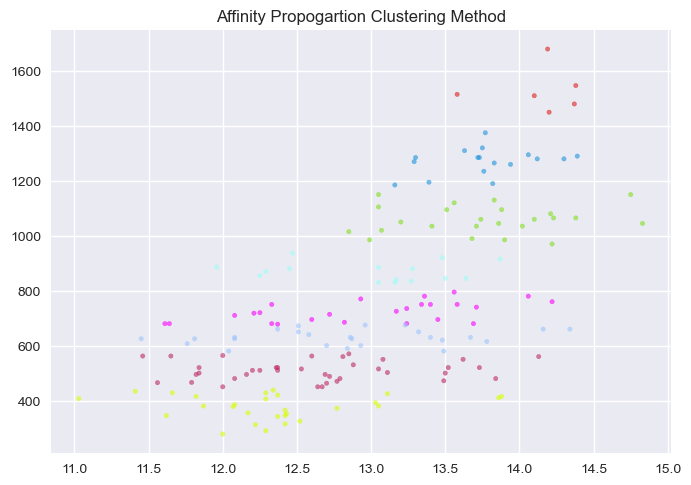

In [356]:
# [4]
wine_afp['cluster']=afp.fit_predict(X,Y)
centroids = afp.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
wine_afp['cen_x'] = wine_afp.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5], 6:cen_x[6], 7:cen_x[7]})
wine_afp['cen_y'] = wine_afp.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 4:cen_y[4], 4:cen_y[4], 5:cen_y[5], 6:cen_y[6], 7:cen_y[7]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#A0C6FE', '#A0FEF8', '#D8FF00', '#FB00FF', '#BE2A64']
wine_afp['c'] = wine_afp.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6], 7:colors[7]})

plt.scatter(wine_afp['alcohol'], wine_afp['proline'], c=wine_afp.c, alpha = 0.6, s=10)
plt.title("Affinity Propogartion Clustering Method")

#### Affinity Propagation with Standard Scaler and PCA

In [357]:
sclr = StandardScaler()
pca = PCA(n_components=7)
x_pca = pca.fit_transform(sclr.fit_transform(X))

In [358]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, Y, test_size=0.2, random_state=42)

In [359]:
afp_pca_sclr = AffinityPropagation(damping=0.89,random_state=3)

In [360]:
afp_pca_sclr.fit(x_train, y_train)

AffinityPropagation(damping=0.89, random_state=3)

In [361]:
y_pred_afp_pca_sclr = afp_pca_sclr.predict(x_test)

#### Internal Evaluation Metrics for Affinity Propogation Clustering with Standard Scaler and PCA

In [362]:
shc = silhouette_score(x_test, y_pred_afp_pca_sclr)

chs = calinski_harabasz_score(x_test, y_pred_afp_pca_sclr)

dbs = davies_bouldin_score(x_test, y_pred_afp_pca_sclr) 

print("The \033[1m silhouette score of Affinity Propogation with Standard Scaler and PCA \033[0m is:\033[1m", shc,"\033[0m")
print("The \033[1m calinski harabasz score of Affinity Propogation with Standard Scaler and PCA \033[0m is:\033[1m", chs,"\033[0m")
print("The \033[1m davies bouldin score of Affinity Propogation with Standard Scaler and PCA \033[0m is:\033[1m", dbs,"\033[0m")

The  silhouette score of Affinity Propogation with Standard Scaler and PCA  is: 0.06771171807462599 
The  calinski harabasz score of Affinity Propogation with Standard Scaler and PCA  is: 10.238760685546751 
The  davies bouldin score of Affinity Propogation with Standard Scaler and PCA  is: 1.878861972802326 


#### External Evaluation Metrics for Affinity Propogation Clustering with Standard Scaler and PCA

In [363]:
vms = v_measure_score(y_test, y_pred_afp_pca_sclr)
ars = adjusted_rand_score(y_test, y_pred_afp_pca_sclr)

print("The \033[1mv measure score of Affinity Propogation with Standard Scaler and PCA \033[0m is:\033[1m", vms,"\033[0m")
print("The \033[1madjusted rand score of Affinity Propogation with Standard Scaler and PCA  \033[0m is:\033[1m", ars,"\033[0m")

The v measure score of Affinity Propogation with Standard Scaler and PCA  is: 0.6149572563012716 
The adjusted rand score of Affinity Propogation with Standard Scaler and PCA   is: 0.3693181818181818 


In [364]:
wine_pca_afp_sclr = pd.DataFrame(x_pca)
wine_pca_afp_sclr.columns = ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7']
wine_pca_afp_sclr['classes'] = Y
wine_pca_afp_sclr.shape

(178, 8)

Text(0.5, 1.0, 'Affinity Propogation Clustering Method with PCA and Standard Scaler')

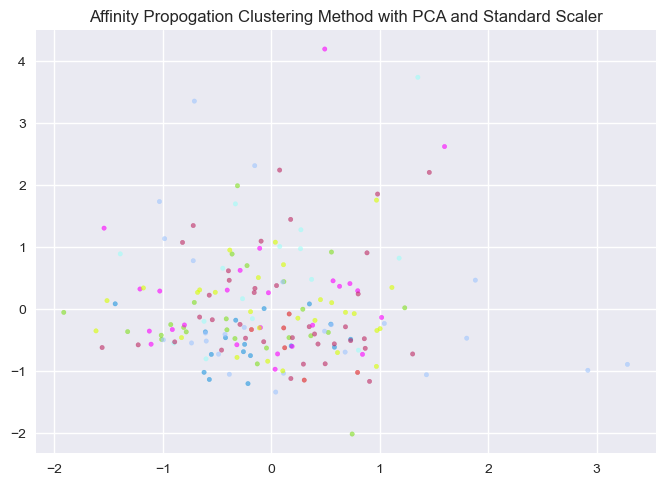

In [365]:
# [4]
wine_pca_afp_sclr['cluster']=afp.fit_predict(X,Y)
centroids = afp.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
wine_pca_afp_sclr['cen_x'] = wine_pca_afp_sclr.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5], 6:cen_x[6], 7:cen_x[7]})
wine_pca_afp_sclr['cen_y'] = wine_pca_afp_sclr.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 4:cen_y[4], 4:cen_y[4], 5:cen_y[5], 6:cen_y[6], 7:cen_y[7]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#A0C6FE', '#A0FEF8', '#D8FF00', '#FB00FF', '#BE2A64']
wine_pca_afp_sclr['c'] = wine_pca_afp_sclr.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6], 7:colors[7]})

plt.scatter(wine_pca_afp_sclr['pca_6'], wine_pca_afp_sclr['pca_5'], c=wine_pca_afp_sclr.c, alpha = 0.6, s=10)
plt.title("Affinity Propogation Clustering Method with PCA and Standard Scaler")

# 6. Mean-Shift  Clustering Method [8]

In [366]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [367]:
bandwidth = estimate_bandwidth(x_train, quantile = 0.2, n_samples=178)
ms_cls = MeanShift(bandwidth = bandwidth)
ms_cls.fit(x_train, y_train)

MeanShift(bandwidth=120.59727484964449)

In [368]:
y_pred_ms = ms_cls.predict(x_test)

#### Internal Evaluation Metrics for Mean Shift Clustering 

In [369]:
ms_shc = silhouette_score(x_test, y_pred_ms)

ms_chs = calinski_harabasz_score(x_test, y_pred_ms)

ms_dbs = davies_bouldin_score(x_test, y_pred_ms) 

print("The \033[1m silhouette score of Mean Shift Clustering \033[0m is:\033[1m", shc,"\033[0m")
print("The \033[1m calinski harabasz score of Mean Shift Clustering \033[0m is:\033[1m", chs,"\033[0m")
print("The \033[1m davies bouldin score of Mean Shift Clustering \033[0m is:\033[1m", dbs,"\033[0m")

The  silhouette score of Mean Shift Clustering  is: 0.06771171807462599 
The  calinski harabasz score of Mean Shift Clustering  is: 10.238760685546751 
The  davies bouldin score of Mean Shift Clustering  is: 1.878861972802326 


#### External Evaluation Metrics for Mean Shift Clustering 

In [370]:
ms_vms = v_measure_score(y_test, y_pred_ms)
ms_ars = adjusted_rand_score(y_test, y_pred_ms)

print("The \033[1mv measure score of Mean Shift Clustering \033[0m is:\033[1m", vms,"\033[0m")
print("The \033[1madjusted rand score of Mean Shift Clustering  \033[0m is:\033[1m", ars,"\033[0m")

The v measure score of Mean Shift Clustering  is: 0.6149572563012716 
The adjusted rand score of Mean Shift Clustering   is: 0.3693181818181818 


In [371]:
wine = pd.DataFrame(X)
wine.columns = data.feature_names
wine['classes'] = Y
wine.shape

(178, 14)

Text(0.5, 1.0, 'Mean-Shift Clustering Method')

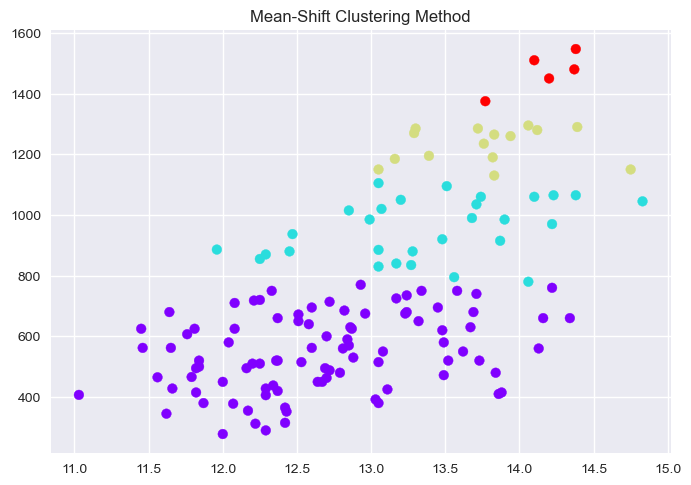

In [372]:
# [3]
plt.scatter(x=x_train[:,0], y=x_train[:,12], c = ms_cls.labels_, cmap='rainbow')
plt.title("Mean-Shift Clustering Method")

# Part III: Classification

### Classification methods used

1) Logistic Regression

2) Gaussian Naive Bayes [9]

3) Decision Trees

4) Random Forest

5) Support Vector Machines

6) K Nearest Neighbours [10]

7) Ada Boost Classifier [11]

# Classification of Wine dataset using Classification methods offered by sklearn

#### The required imports for classification

In [373]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean, std
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, balanced_accuracy_score, roc_auc_score, roc_curve 
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

## use the inbuilt library to load the data
from sklearn.datasets import load_wine

#### Load the data into X(features) and Y(classes) variables

In [374]:
wine = load_wine()

X = wine.data

Y = wine.target

#### K fold cross-validation which will be used for all the methods [1]

In [375]:
cv = KFold(n_splits = 8, shuffle = True, random_state = 42)

# Logistic Regression Classificaion Method

#### Logistic Regression with full data and then cross validated with 8 folds and the data is split as 67% for training and 33% as testing

## Split data protocol

In [376]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [377]:
clf = LogisticRegression(max_iter=10000)

In [378]:
clf.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

#### Cross validate and measure the scores and calculate the mean accuracy of the model

In [379]:
scores = cross_val_score(clf, x_train, y_train, cv=cv, scoring='accuracy')

In [380]:
print("The mean accuracy obtained using Logistic Regression are:\n",scores, scores.mean())

The mean accuracy obtained using Logistic Regression are:
 [0.8        1.         1.         0.86666667 0.86666667 1.
 1.         0.92857143] 0.9327380952380953


In [381]:
y_pred = clf.predict(x_test)

#### Plot the ROC-AUC curve by calculating the TPR and FPR for the particular model [2]

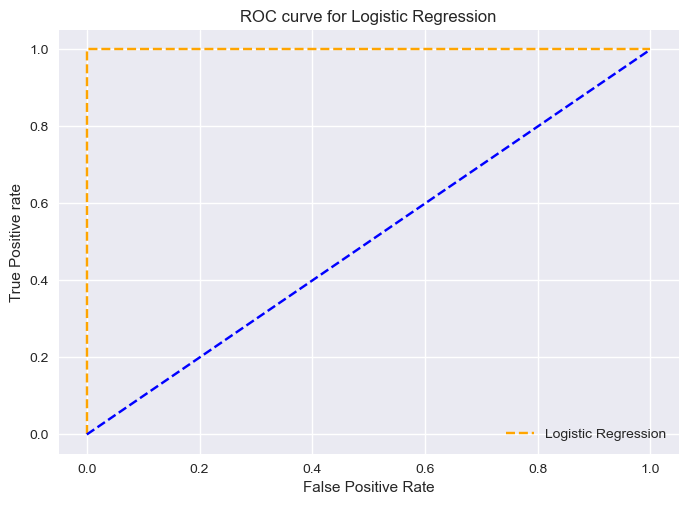

In [382]:
# [2]
probs = clf.predict_proba(x_test)

fpr1_full, tpr1_full, thresh1 = roc_curve(y_test, probs[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr_full, p_tpr_full, _ = roc_curve(y_test, random_probs, pos_label=1)

##matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_full, tpr1_full, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr_full, p_tpr_full, linestyle='--', color='blue')
#done
# title
plt.title('ROC curve for Logistic Regression')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

#### ROC AUC score

In [383]:
print('the ROC-AUC score of Logistic Regression', roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr'))

the ROC-AUC score of Logistic Regression 1.0


              Confusion Matrix of Logistic Regression


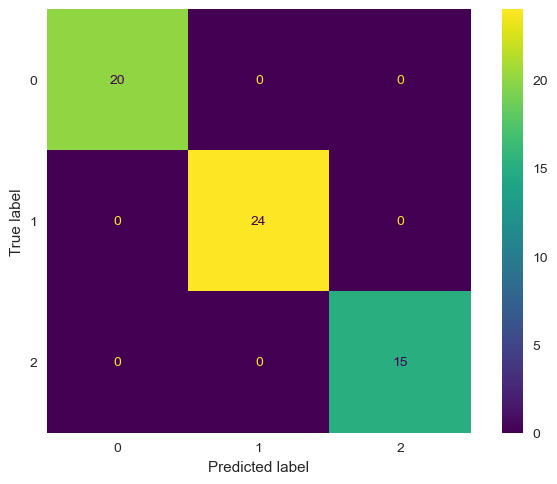

In [384]:
cm=confusion_matrix(y_test,y_pred,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
print('              \033[1mConfusion Matrix of Logistic Regression\033[0m')
disp.plot()
plt.grid(False)
plt.show()

#### Plot the confusion matrix

#### To display the classification report

In [385]:
print("\033[1mThe classification report of Logistic Regression is:\n------------------Classification Report------------------\033[0m \n",classification_report(y_test,y_pred))

The classification report of Logistic Regression is:
------------------Classification Report------------------ 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        15

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [386]:
print("The \033[1m Balanced accuracy score for Logistic Regression \033[0m  is:\n \033[0m",balanced_accuracy_score(y_test, y_pred),"\033[0m")

The  Balanced accuracy score for Logistic Regression   is:
  1.0 


### Classification without KFold

In [387]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [388]:
clf.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [389]:
y_pred = clf.predict(x_test)

In [390]:
y_test, y_pred

(array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
        2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1]),
 array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
        2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1]))

In [391]:
from sklearn.metrics import accuracy_score

In [392]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy score for Logistic Regression without KFold cross-validation is:", accuracy)

The accuracy score for Logistic Regression without KFold cross-validation is: 1.0


#### Let's plot the ROC-AUC curves, display the confusion matrix and print the classification report which displays the Precision, recall and the F1-score to evaluate the model. The subsequent cells represent the balanced accuracy score for the particular model [2]

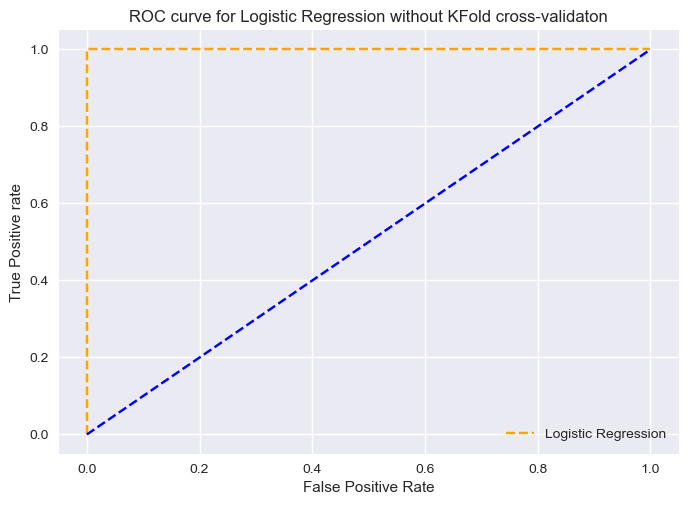

In [393]:
# [2]
probs = clf.predict_proba(x_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, probs[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

##matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for Logistic Regression without KFold cross-validaton')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

#### ROC AUC score

In [394]:
print('the ROC-AUC score of Logistic Regression without k fold', roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr'))

the ROC-AUC score of Logistic Regression without k fold 1.0


         Confusion Matrix of Logistic Regression without KFold cross-validation


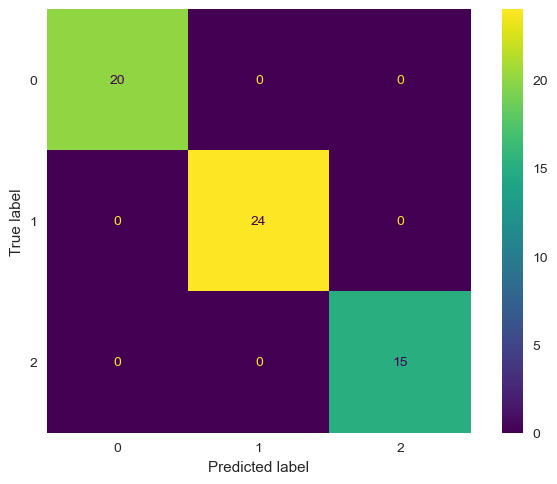

In [395]:
cm=confusion_matrix(y_test,y_pred,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
print('         \033[1mConfusion Matrix of Logistic Regression without KFold cross-validation\033[0m')
disp.plot()
plt.grid(False)
plt.show()

In [396]:
print("\033[1mThe classification report of Logistic Regression without KFold is:\n------------------Classification Report------------------\033[0m \n",classification_report(y_test,y_pred))

The classification report of Logistic Regression without KFold is:
------------------Classification Report------------------ 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        15

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [397]:
print("\033[1mThe Balanced accuracy score of Logistic Regression without KFold \033[0m is: \033[1m", balanced_accuracy_score(y_test, y_pred))

The Balanced accuracy score of Logistic Regression without KFold  is:  1.0


## Let's take Gaussian Naive Bayes [9] to keep a reference model, which takes all the features to be independent. This will help us in understanding if the classification algorithms need dimensionality reduction

In [398]:
gnb = GaussianNB(var_smoothing=0.001)

In [399]:
gnb.fit(x_train, y_train)

GaussianNB(var_smoothing=0.001)

In [400]:
y_pred_gnb = gnb.predict(x_test)

In [401]:
print("The accuracy score when Gaussian Naive Bayes is taken as a reference model is:",accuracy_score(y_test, y_pred_gnb))

The accuracy score when Gaussian Naive Bayes is taken as a reference model is: 0.7966101694915254


#### Let's plot the ROC-AUC curves, display the confusion matrix and print the classification report which displays the Precision, recall and the F1-score to evaluate the model. The subsequent cells represent the balanced accuracy score for the particular model  [2]


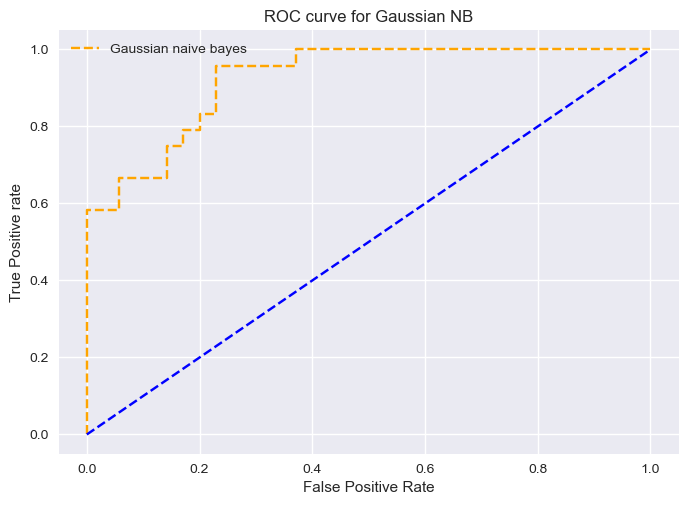

In [402]:
# [2]
probs = gnb.predict_proba(x_test)

fpr1_gnb, tpr1_gnb, thresh1_gnb = roc_curve(y_test, probs[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr_gnb, p_tpr_gnb, _ = roc_curve(y_test, random_probs, pos_label=1)

##matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_gnb, tpr1_gnb, linestyle='--',color='orange', label='Gaussian naive bayes')
plt.plot(p_fpr_gnb, p_tpr_gnb, linestyle='--', color='blue')
# title
plt.title('ROC curve for Gaussian NB')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

#### ROC AUC score

In [403]:
print('the ROC-AUC score of Gaussian Naive Bayes', roc_auc_score(y_test, gnb.predict_proba(x_test), multi_class='ovr'))

the ROC-AUC score of Gaussian Naive Bayes 0.9463203463203463


              Confusion Matrix of Gaussian NB


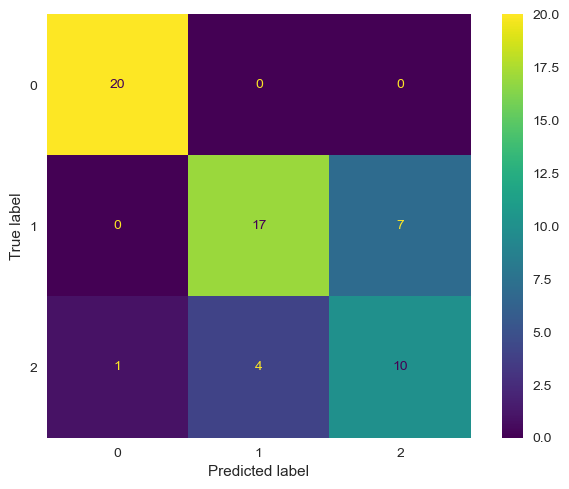

In [404]:
cm=confusion_matrix(y_test,y_pred_gnb,labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
print('              \033[1mConfusion Matrix of Gaussian NB\033[0m')
disp.plot()
plt.grid(False)
plt.show()

In [405]:
print("\033[1mThe classification report when Gaussian Naive Bayes is taken as a reference model is:\n\n------------------Classification Report------------------\033[0m \n",classification_report(y_test, y_pred_gnb))

The classification report when Gaussian Naive Bayes is taken as a reference model is:

------------------Classification Report------------------ 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.81      0.71      0.76        24
           2       0.59      0.67      0.62        15

    accuracy                           0.80        59
   macro avg       0.78      0.79      0.79        59
weighted avg       0.80      0.80      0.80        59



In [406]:
print("\033[1mThe Balanced accuracy score when Gaussian Naive Bayes is taken as a reference model\033[0m is:\033[1m", balanced_accuracy_score(y_test, y_pred_gnb))

The Balanced accuracy score when Gaussian Naive Bayes is taken as a reference model is: 0.7916666666666666


### Logistic regression with PCA

In [407]:
pca = PCA(n_components = 7, svd_solver='randomized')

In [408]:
x_pca = pca.fit_transform(X)

In [409]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, Y, test_size=0.33, random_state=42)

In [410]:
clf.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [411]:
y_pred_lr_pca = clf.predict(x_test)

#### Cross validate and measure the scores and calculate the mean accuracy of the model

In [412]:
score = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv = cv)

In [413]:
print("The mean accuracy obtained using Logistic Regression with PCA is",score.mean())

The mean accuracy obtained using Logistic Regression with PCA is 0.924404761904762


#### Let's plot the ROC-AUC curves, display the confusion matrix and print the classification report which displays the Precision, recall and the F1-score to evaluate the model. The subsequent cells represent the balanced accuracy score for the particular model [2]

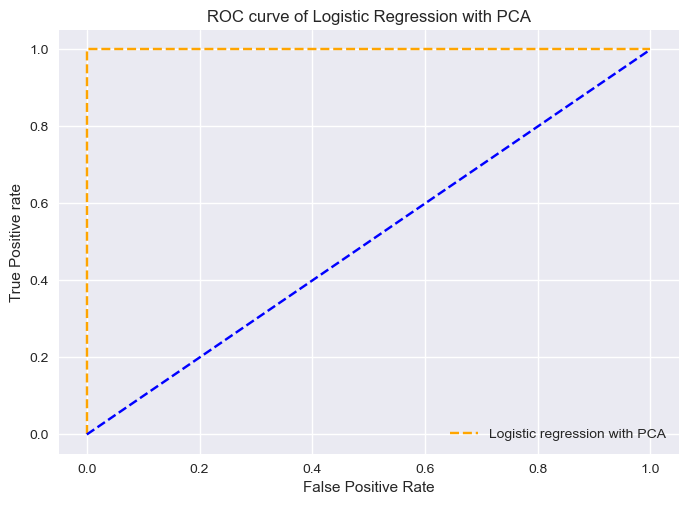

In [414]:
# [2]
probs = clf.predict_proba(x_test)

fpr1_lr_pca, tpr1_lr_pca, thresh1_gnb = roc_curve(y_test, probs[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr_lr_pca, p_tpr_lr_pca, _ = roc_curve(y_test, random_probs, pos_label=1)

##matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_lr_pca, tpr1_lr_pca, linestyle='--',color='orange', label='Logistic regression with PCA')
plt.plot(p_fpr_lr_pca, p_tpr_lr_pca, linestyle='--', color='blue')
# title
plt.title('ROC curve of Logistic Regression with PCA')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

#### ROC AUC score

In [415]:
print('the ROC-AUC score of Logistic Regression with PCA', roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr'))

the ROC-AUC score of Logistic Regression with PCA 1.0


              Confusion Matrix of Logistic Regression with PCA


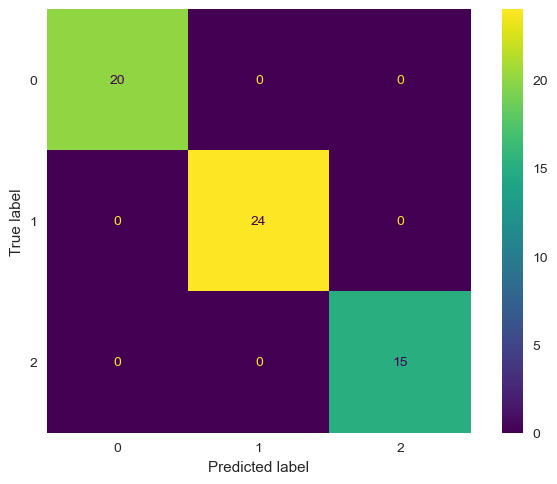

In [416]:
cm=confusion_matrix(y_test,y_pred_lr_pca,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
print('              \033[1mConfusion Matrix of Logistic Regression with PCA\033[0m')
disp.plot()
plt.grid(False)
plt.show()

In [417]:
print("\033[1mThe classification report of Logistic Regression with PCA is:\n\n------------------Classification Report------------------\033[0m \n",classification_report(y_test, y_pred_lr_pca))

The classification report of Logistic Regression with PCA is:

------------------Classification Report------------------ 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        15

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [418]:
print("\033[1mThe Balanced accuracy score obtained using Logistic Regression with PCA\033[0m is: \033[1m", balanced_accuracy_score(y_test, y_pred_lr_pca))

The Balanced accuracy score obtained using Logistic Regression with PCA is:  1.0


### Logistic Regression with PCA and standard scaler

In [419]:
sclr = StandardScaler()

In [420]:
x_transform = sclr.fit_transform(X)

In [421]:
x_pca = PCA(n_components=7, svd_solver='randomized').fit_transform(x_transform)

In [422]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, Y, test_size=0.33, random_state=42)

In [423]:
clf.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [424]:
y_pred_lr_pca_sclr = clf.predict(x_test)

#### Cross validate and measure the scores and calculate the mean accuracy of the model

In [425]:
scores = cross_val_score(clf, x_train, y_train, cv=cv, scoring='accuracy')

In [426]:
print("The accuracy of Logistic Regression with PCA and Standard Scaler is",scores.mean())

The accuracy of Logistic Regression with PCA and Standard Scaler is 0.9660714285714286


#### Let's plot the ROC-AUC curves, display the confusion matrix and print the classification report which displays the Precision, recall and the F1-score to evaluate the model. The subsequent cells represent the balanced accuracy score for the particular model [2]


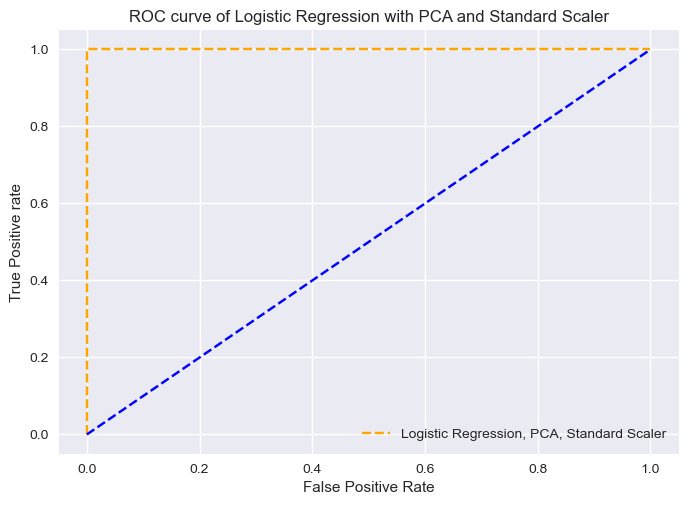

In [427]:
# [2]
probs = clf.predict_proba(x_test)

fpr1_lr_pca_sclr, tpr1_lr_pca_sclr, thresh1_gnb = roc_curve(y_test, probs[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr_lr_pca_sclr, p_tpr_lr_pca_sclr, _ = roc_curve(y_test, random_probs, pos_label=1)

##matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_lr_pca_sclr, tpr1_lr_pca_sclr, linestyle='--',color='orange', label='Logistic Regression, PCA, Standard Scaler')
plt.plot(p_fpr_lr_pca_sclr, p_tpr_lr_pca_sclr, linestyle='--', color='blue')
# title
plt.title('ROC curve of Logistic Regression with PCA and Standard Scaler')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

#### ROC AUC score

In [428]:
print('the ROC-AUC score of Logistic Regression with PCA and Standard Scaler', roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr'))

the ROC-AUC score of Logistic Regression with PCA and Standard Scaler 1.0


      Confusion Matrix of Logistic Regression with PCA and Standard Scaler


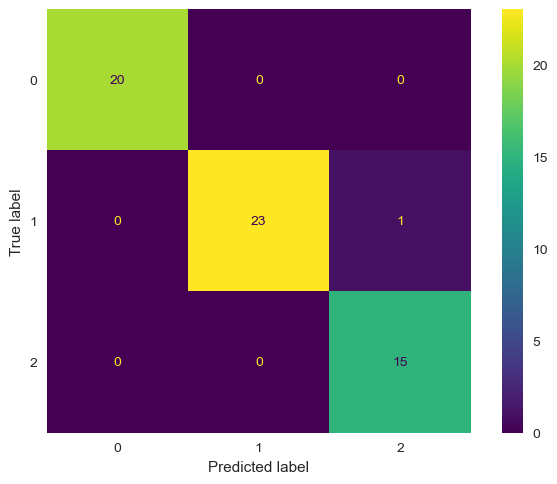

In [429]:
cm=confusion_matrix(y_test,y_pred_lr_pca_sclr,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
print('      \033[1mConfusion Matrix of Logistic Regression with PCA and Standard Scaler\033[0m')
disp.plot()
plt.grid(False)
plt.show()

In [430]:
print("\033[1mThe classification report of Logistic Regression with PCA and Standard Scaler is:\n\n------------------Classification Report------------------\033[0m \n",classification_report(y_test, y_pred_lr_pca_sclr))

The classification report of Logistic Regression with PCA and Standard Scaler is:

------------------Classification Report------------------ 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.96      0.98        24
           2       0.94      1.00      0.97        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



In [431]:
print("\033[1mThe Balanced accuracy score obtained using Logistic Regression with PCA and Standard Scaler\033[0m is:\033[1m", balanced_accuracy_score(y_test, y_pred_lr_pca_sclr))

The Balanced accuracy score obtained using Logistic Regression with PCA and Standard Scaler is: 0.9861111111111112


# Decision Tree Classification Method

In [432]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

In [433]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

#### Cross validate and measure the scores and calculate the mean accuracy of the model

In [434]:
cross_val_score(decision_tree, x_train, y_train, cv=cv, scoring='accuracy')

array([0.8       , 0.93333333, 0.86666667, 0.8       , 0.93333333,
       0.93333333, 0.8       , 0.92857143])

In [435]:
y_pred_dt = decision_tree.predict(x_test)

In [436]:
print("The mean accuracy obtained using Decision Tree is :",accuracy_score(y_test,y_pred_dt))

The mean accuracy obtained using Decision Tree is : 0.9661016949152542


#### Let's plot the ROC-AUC curves, display the confusion matrix and print the classification report which displays the Precision, recall and the F1-score to evaluate the model. The subsequent cells represent the balanced accuracy score for the particular model [2]


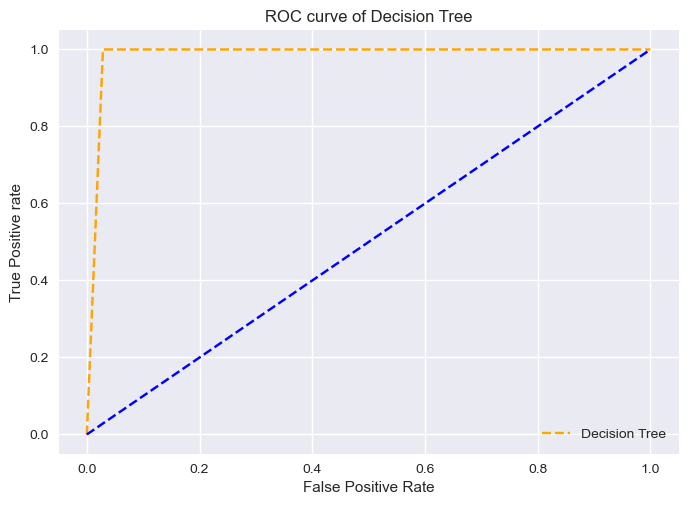

In [437]:
# [2]
probs=decision_tree.predict_proba(x_test)

fpr1_dt, tpr1_dt, thresh1 = roc_curve(y_test, probs[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr_dt, p_tpr_dt, _ = roc_curve(y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_dt, tpr1_dt, linestyle='--',color='orange', label='Decision Tree')
plt.plot(p_fpr_dt, p_tpr_dt, linestyle='--', color='blue')
# title
plt.title('ROC curve of Decision Tree')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

#### ROC AUC score

In [438]:
print('the ROC-AUC score of Decision Tree', roc_auc_score(y_test, decision_tree.predict_proba(x_test), multi_class='ovr'))

the ROC-AUC score of Decision Tree 0.9715201465201465


              Confusion Matrix of Decision Tree


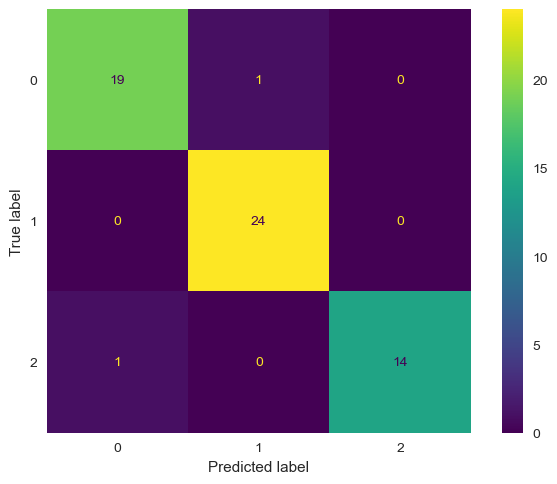

In [439]:
cm=confusion_matrix(y_test,y_pred_dt,labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=decision_tree.classes_)
print('              \033[1mConfusion Matrix of Decision Tree\033[0m')
disp.plot()
plt.grid(False)
plt.show()

#### We will change the depth of the decision tree to see the average accuracy achieved for all the specified depths of the decision trees

In [440]:
print("Variation of accuracy in Decision tree with different depths:")
for d in range (1,10):
    clf_d = DecisionTreeClassifier(max_depth=d, random_state=0)
    accuracy_d=cross_val_score(clf_d, wine.data, wine.target, cv=cv)
    print("Depth: ", d, " Average accuracy:", accuracy_d.mean())

Variation of accuracy in Decision tree with different depths:
Depth:  1  Average accuracy: 0.6180830039525692
Depth:  2  Average accuracy: 0.8312747035573123
Depth:  3  Average accuracy: 0.9041501976284585
Depth:  4  Average accuracy: 0.9041501976284585
Depth:  5  Average accuracy: 0.8927865612648221
Depth:  6  Average accuracy: 0.8927865612648221
Depth:  7  Average accuracy: 0.8927865612648221
Depth:  8  Average accuracy: 0.8927865612648221
Depth:  9  Average accuracy: 0.8927865612648221


In [441]:
print("\033[1mThe classification report of Decision Tree is:\n\n------------------Classification Report------------------\033[0m \n",classification_report(y_test,y_pred_dt))

The classification report of Decision Tree is:

------------------Classification Report------------------ 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.96      1.00      0.98        24
           2       1.00      0.93      0.97        15

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59



In [442]:
print("\033[1mThe Balanced accuracy score obtained using Decision Tree\033[0m is:\033[1m", balanced_accuracy_score(y_test, y_pred_dt))

The Balanced accuracy score obtained using Decision Tree is: 0.9611111111111111


### Decision tree with PCA and Standard Scaler

#### Cross validate and measure the scores and calculate the mean accuracy of the model

In [443]:
sclr = StandardScaler()
x_transform = sclr.fit_transform(X)
x_pca = PCA(n_components=7).fit_transform(sclr.fit_transform(X))
x_train, x_test, y_train, y_test = train_test_split(x_pca,Y,test_size=0.33,random_state=42)
decision_tree.fit(x_train,y_train)
scores = cross_val_score(decision_tree, x_train, y_train, cv=cv, scoring='accuracy')
y_pred_dt_sclr_pca = decision_tree.predict(x_test)

In [444]:
print("The accuracy obtained using Decision Tree with PCA and Standard Scaler is:",scores.mean())

The accuracy obtained using Decision Tree with PCA and Standard Scaler is: 0.9494047619047619


#### Let's plot the ROC-AUC curves, display the confusion matrix and print the classification report which displays the Precision, recall and the F1-score to evaluate the model. The subsequent cells represent the balanced accuracy score for the particular model [2]


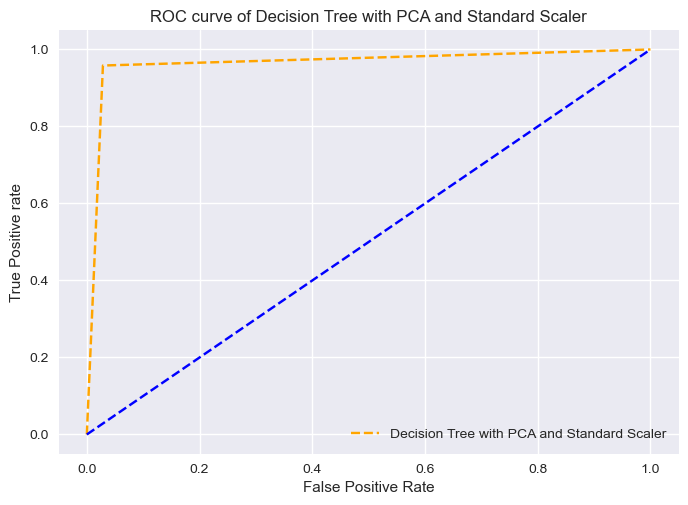

In [445]:
# [2]
probs=decision_tree.predict_proba(x_test)

fpr1_dt_sclr_pca, tpr1_dt_sclr_pca, thresh1 = roc_curve(y_test, probs[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr_dt_sclr_pca, p_tpr_dt_sclr_pca, _ = roc_curve(y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_dt_sclr_pca, tpr1_dt_sclr_pca, linestyle='--',color='orange', label='Decision Tree with PCA and Standard Scaler')
plt.plot(p_fpr_dt_sclr_pca, p_tpr_dt_sclr_pca, linestyle='--', color='blue')
# title
plt.title('ROC curve of Decision Tree with PCA and Standard Scaler')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

#### ROC AUC score

In [446]:
print('the ROC-AUC score of Decision Tree with PCA and Standard Scaler', roc_auc_score(y_test, decision_tree.predict_proba(x_test), multi_class='ovr'))

the ROC-AUC score of Decision Tree with PCA and Standard Scaler 0.9756868131868132


              Confusion Matrix of Decision Tree with PCA and Standard Scaler


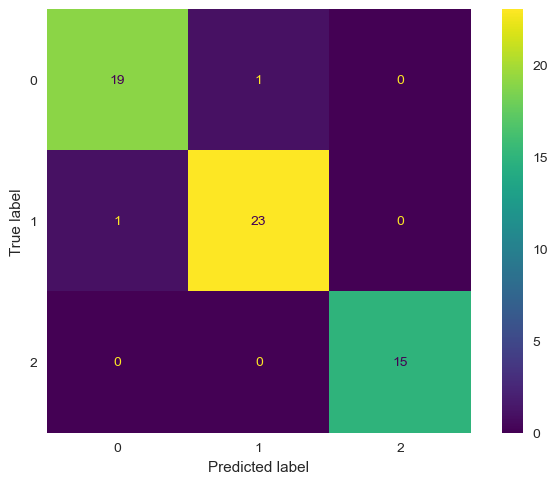

In [447]:
cm=confusion_matrix(y_test,y_pred_dt_sclr_pca,labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=decision_tree.classes_)
print('              \033[1mConfusion Matrix of Decision Tree with PCA and Standard Scaler\033[0m')
disp.plot()
plt.grid(False)
plt.show()

In [448]:
print("\033[1mThe classification report of Decision Tree with PCA and Standard Scaler is:\n\n------------------Classification Report------------------\033[0m \n",classification_report(y_test,y_pred_dt_sclr_pca))

The classification report of Decision Tree with PCA and Standard Scaler is:

------------------Classification Report------------------ 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.96      0.96      0.96        24
           2       1.00      1.00      1.00        15

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



In [449]:
print("\033[1mThe Balanced accuracy score of Decision Tree with PCA and Standard Scaler\033[0m is \033[1m:", balanced_accuracy_score(y_test, y_pred_dt_sclr_pca))

The Balanced accuracy score of Decision Tree with PCA and Standard Scaler is : 0.9694444444444444


# Random Forest Classification

In [450]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [451]:
random_forest = RandomForestClassifier(max_depth=5,random_state=0)

In [452]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

#### Cross validate and measure the scores and calculate the mean accuracy of the model

In [453]:
cross_val_score(random_forest, X, Y, cv=cv, scoring='accuracy')

array([1.        , 1.        , 1.        , 1.        , 0.90909091,
       0.95454545, 1.        , 1.        ])

In [454]:
y_pred_rf = random_forest.predict(x_test)

In [455]:
print("The mean accuracy obtained using Random Forest Classfication is: ",accuracy_score(y_test,y_pred_rf))

The mean accuracy obtained using Random Forest Classfication is:  1.0


#### Let's plot the ROC-AUC curves, display the confusion matrix and print the classification report which displays the Precision, recall and the F1-score to evaluate the model. The subsequent cells represent the balanced accuracy score for the particular model [2]


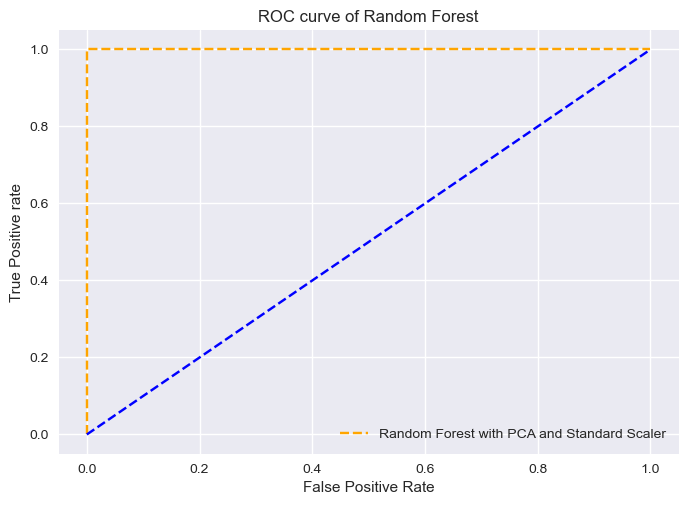

In [456]:
# [2]
probs=random_forest.predict_proba(x_test)

fpr1_rf, tpr1_rf, thresh1 = roc_curve(y_test, probs[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr_rf, p_tpr_rf, _ = roc_curve(y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_rf, tpr1_rf, linestyle='--',color='orange', label='Random Forest with PCA and Standard Scaler')
plt.plot(p_fpr_rf, p_tpr_rf, linestyle='--', color='blue')
# title
plt.title('ROC curve of Random Forest')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

#### ROC AUC score

In [457]:
print('the ROC-AUC score of Random Forest', roc_auc_score(y_test, random_forest.predict_proba(x_test), multi_class='ovr'))

the ROC-AUC score of Random Forest 1.0


              Confusion Matrix of Random Forest


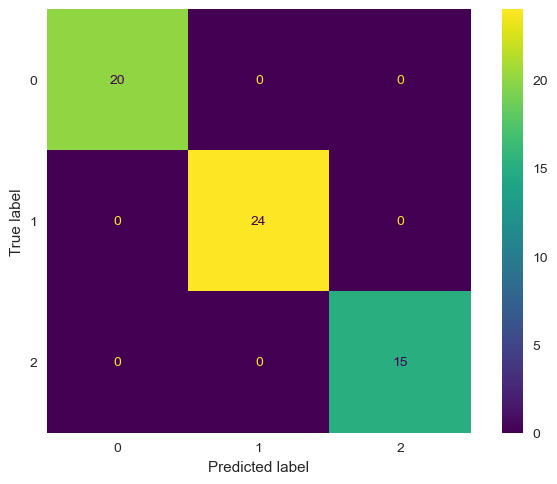

In [458]:
cm=confusion_matrix(y_test,y_pred_rf,labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_forest.classes_)
print('              \033[1mConfusion Matrix of Random Forest\033[0m')
disp.plot()
plt.grid(False)
plt.show()

In [459]:
print("\033[1mThe classification report of Random Forest is:\n\n------------------Classification Report------------------\033[0m \n",classification_report(y_test, y_pred_rf))

The classification report of Random Forest is:

------------------Classification Report------------------ 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        15

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [460]:
print("\033[1mThe Balanced accuracy score obtained using Random Forest \033[0m is:\033[1m", balanced_accuracy_score(y_test, y_pred_rf))

The Balanced accuracy score obtained using Random Forest  is: 1.0


### Random Forest Classifier with PCA and Standard scaler

#### Cross validate and measure the scores and calculate the mean accuracy of the model

In [461]:
sclr = StandardScaler()
x_transform = sclr.fit_transform(X)
x_pca = PCA(n_components=7).fit_transform(sclr.fit_transform(X))
x_train, x_test, y_train, y_test = train_test_split(x_pca, Y, test_size=0.33, random_state=42)
random_forest.fit(x_train,y_train)
scores = cross_val_score(random_forest, x_train, y_train, cv=cv, scoring='accuracy')
y_pred_rf_sclr_pca = random_forest.predict(x_test)

In [462]:
print("The accuracy obtained using Random Forest with PCA and Standard Scaler is: ",scores.mean())

The accuracy obtained using Random Forest with PCA and Standard Scaler is:  0.9660714285714286


#### Let's plot the ROC-AUC curves, display the confusion matrix and print the classification report which displays the Precision, recall and the F1-score to evaluate the model. The subsequent cells represent the balanced accuracy score for the particular model [2]


Text(0, 0.5, 'True Positive rate')

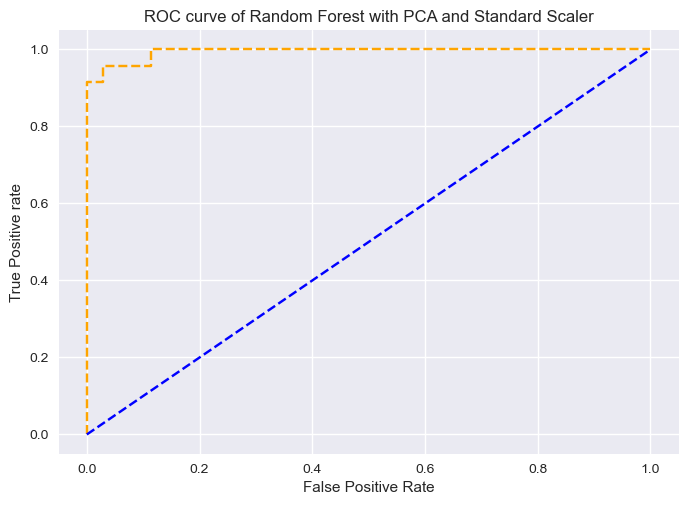

In [463]:
# [2]
probs=random_forest.predict_proba(x_test)

fpr1_rf_sclr_pca, tpr1_rf_sclr_pca, thresh1 = roc_curve(y_test, probs[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr_rf_sclr_pca, p_tpr_rf_sclr_pca, _ = roc_curve(y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_rf_sclr_pca, tpr1_rf_sclr_pca, linestyle='--',color='orange', label='Decision Tree')
plt.plot(p_fpr_rf_sclr_pca, p_tpr_rf_sclr_pca, linestyle='--', color='blue')
# title
plt.title('ROC curve of Random Forest with PCA and Standard Scaler')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

#### ROC AUC score

In [464]:
print('the ROC-AUC score of Random Forest with PCA and Standard Scaler', roc_auc_score(y_test, random_forest.predict_proba(x_test), multi_class='ovr'))

the ROC-AUC score of Random Forest with PCA and Standard Scaler 0.9975885225885226


          Confusion Matrix of Random Forest with PCA and Standard Scaler


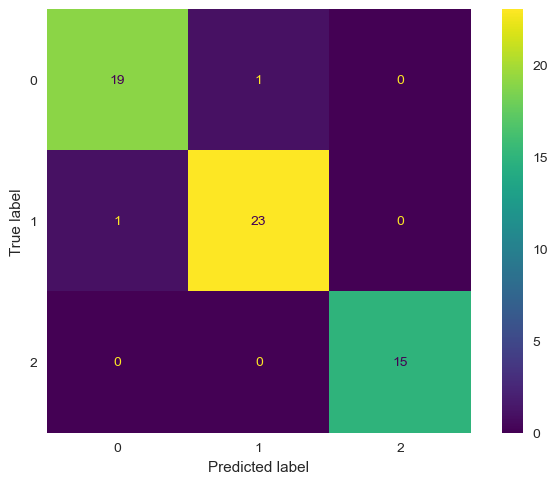

In [465]:
cm=confusion_matrix(y_test,y_pred_rf_sclr_pca,labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_forest.classes_)
print('          \033[1mConfusion Matrix of Random Forest with PCA and Standard Scaler\033[0m')
disp.plot()
plt.grid(False)
plt.show()

In [466]:
print("\033[1mThe classification report of Random Forest with PCA and Standard Scaler is:\n\n------------------Classification Report------------------\033[0m\n",classification_report(y_test,y_pred_rf_sclr_pca))

The classification report of Random Forest with PCA and Standard Scaler is:

------------------Classification Report------------------
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.96      0.96      0.96        24
           2       1.00      1.00      1.00        15

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



In [467]:
print("\033[1mThe Balanced accuracy score obtained using Random Forest with PCA and Standard Scaler\033[0m is:\033[1m", balanced_accuracy_score(y_test, y_pred_rf_sclr_pca))

The Balanced accuracy score obtained using Random Forest with PCA and Standard Scaler is: 0.9694444444444444


# SVC - Support Vector Classifier

In [468]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [469]:
svc = SVC(C=10,kernel='rbf',probability=True)

In [470]:
svc.fit(x_train, y_train)

SVC(C=10, probability=True)

#### Cross validate and measure the scores and calculate the mean accuracy of the model

In [471]:
scores = cross_val_score(svc, x_train, y_train, scoring='accuracy', cv=cv)

In [472]:
print("The mean accuracy obtained using SVC is :",scores.mean())

The mean accuracy obtained using SVC is : 0.6994047619047619


In [473]:
y_pred_svc = svc.predict(x_test)

#### Let's plot the ROC-AUC curves, display the confusion matrix and print the classification report which displays the Precision, recall and the F1-score to evaluate the model. The subsequent cells represent the balanced accuracy score for the particular model [2]


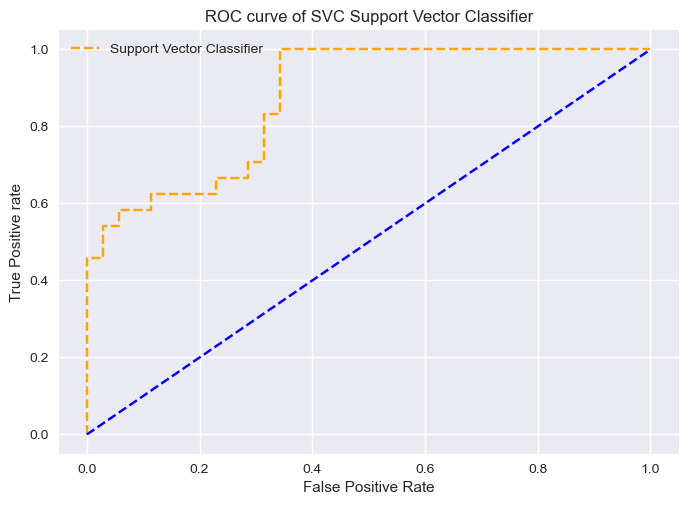

In [474]:
# [2]
probs = svc.predict_proba(x_test)

fpr1_svc, tpr1_svc, thresh1_svc = roc_curve(y_test, probs[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr_svc, p_tpr_svc, _ = roc_curve(y_test, random_probs, pos_label=1)

##matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_svc, tpr1_svc, linestyle='--',color='orange', label='Support Vector Classifier')
plt.plot(p_fpr_svc, p_tpr_svc, linestyle='--', color='blue')
# title
plt.title('ROC curve of SVC Support Vector Classifier')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

#### ROC AUC score

In [475]:
print('the ROC-AUC score of SVC', roc_auc_score(y_test, svc.predict_proba(x_test), multi_class='ovr'))

the ROC-AUC score of SVC 0.8994588744588744


              Confusion Matrix of SVC Support Vector Classifier


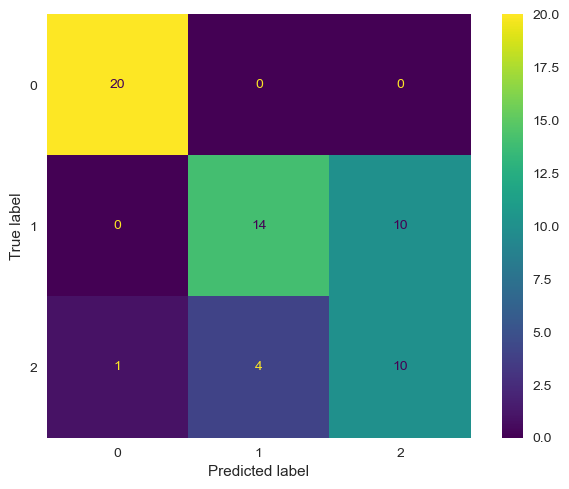

In [476]:
cm=confusion_matrix(y_test,y_pred_svc,labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
print('              \033[1mConfusion Matrix of SVC Support Vector Classifier\033[0m')
disp.plot()
plt.grid(False)
plt.show()

In [477]:
print("\033[1mThe classification report of SVC is:\n\n------------------Classification Report------------------\033[0m \n",classification_report(y_test, y_pred_svc))

The classification report of SVC is:

------------------Classification Report------------------ 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.78      0.58      0.67        24
           2       0.50      0.67      0.57        15

    accuracy                           0.75        59
   macro avg       0.74      0.75      0.74        59
weighted avg       0.77      0.75      0.75        59



In [478]:
print("\033[1mThe Balanced accuracy score obtained using SVC\033[0m is:\033[1m", balanced_accuracy_score(y_test, y_pred_svc))

The Balanced accuracy score obtained using SVC is: 0.75


### SVC with standard scaler and PCA

In [479]:
x_pca = PCA(n_components=7).fit_transform(sclr.fit_transform(X))

In [480]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, Y, test_size=0.33, random_state=42)

In [481]:
svc.fit(x_train,y_train)

SVC(C=10, probability=True)

#### Cross validate and measure the scores and calculate the mean accuracy of the model

In [482]:
scores = cross_val_score(svc, x_train, y_train, cv=cv, scoring='accuracy')

In [483]:
y_pred_svc_pca_sclr = svc.predict(x_test)

#### Let's plot the ROC-AUC curves, display the confusion matrix and print the classification report which displays the Precision, recall and the F1-score to evaluate the model. The subsequent cells represent the balanced accuracy score for the particular model [2]


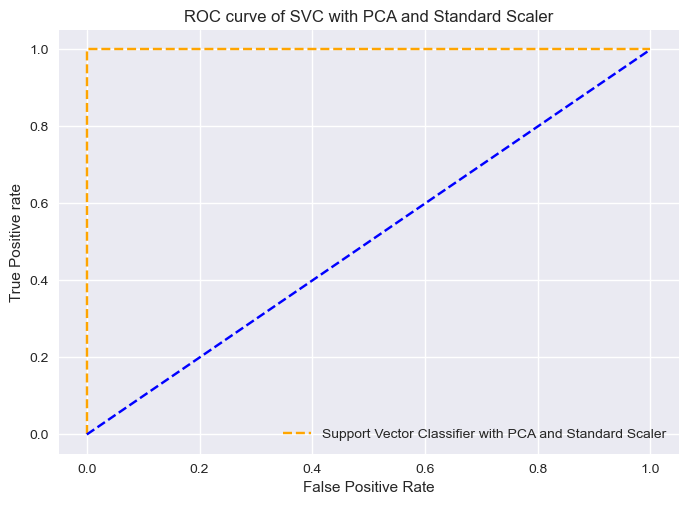

In [484]:
# [2]
probs = svc.predict_proba(x_test)

fpr1_svc_pca_sclr, tpr1_svc_pca_sclr, thresh1_svc = roc_curve(y_test, probs[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr_svc_pca_sclr, p_tpr_svc_pca_sclr, _ = roc_curve(y_test, random_probs, pos_label=1)

##matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_svc_pca_sclr, tpr1_svc_pca_sclr, linestyle='--',color='orange', label='Support Vector Classifier with PCA and Standard Scaler')
plt.plot(p_fpr_svc_pca_sclr, p_tpr_svc_pca_sclr, linestyle='--', color='blue')
# title
plt.title('ROC curve of SVC with PCA and Standard Scaler')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

#### ROC AUC score

In [485]:
print('the ROC-AUC score of SVC with PCA and Standard Scaler', roc_auc_score(y_test, svc.predict_proba(x_test), multi_class='ovr'))

the ROC-AUC score of SVC with PCA and Standard Scaler 1.0


          Confusion Matrix of SVC with PCA and Standard Scaler033


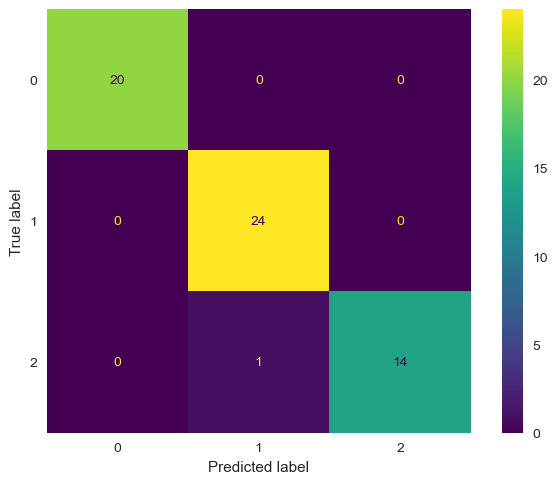

In [486]:
cm=confusion_matrix(y_test,y_pred_svc_pca_sclr,labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
print('          \033[1mConfusion Matrix of SVC with PCA and Standard Scaler033[0m')
disp.plot()
plt.grid(False)
plt.show()

In [487]:
print("\033[1mThe classification report of SVC with PCA and Standard Scaler is:\n\n------------------Classification Report------------------\033[0m\n",classification_report(y_test, y_pred_svc_pca_sclr))

The classification report of SVC with PCA and Standard Scaler is:

------------------Classification Report------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.96      1.00      0.98        24
           2       1.00      0.93      0.97        15

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



In [488]:
print("\033[1mThe Balanced accuracy score obtained using SVC with PCA and Standard Scaler\033[0m is:\033[1m", balanced_accuracy_score(y_test, y_pred_svc_pca_sclr))

The Balanced accuracy score obtained using SVC with PCA and Standard Scaler is: 0.9777777777777779


# K Nearest Neighbours Classification [10]

In [489]:
knn = KNeighborsClassifier(n_neighbors=5)

In [490]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [491]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

#### Cross validate and measure the scores and calculate the mean accuracy of the model

In [492]:
scores = cross_val_score(knn, x_train, y_train, cv=cv, scoring='accuracy')

In [493]:
y_pred_knn = knn.predict(x_test)

In [494]:
print("The mean accuracy obtained using KNN is: ",scores.mean())

The mean accuracy obtained using KNN is:  0.7321428571428572


#### Let's plot the ROC-AUC curves, display the confusion matrix and print the classification report which displays the Precision, recall and the F1-score to evaluate the model. The subsequent cells represent the balanced accuracy score for the particular model [2]


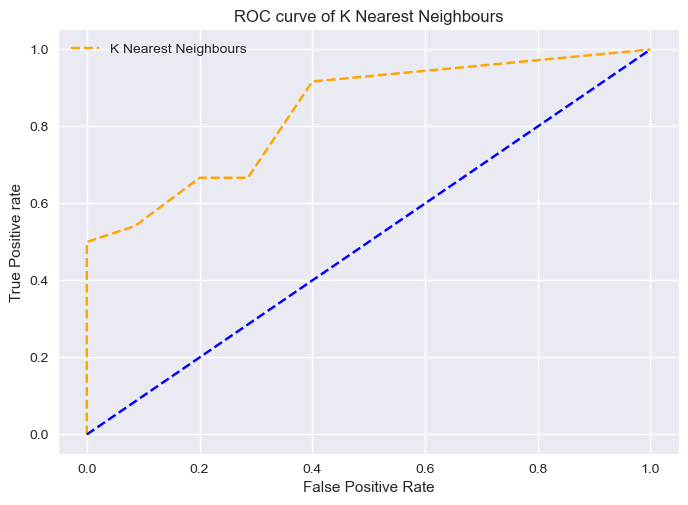

In [495]:
# [2]
probs = knn.predict_proba(x_test)

fpr1_knn, tpr1_knn, thresh1_svc = roc_curve(y_test, probs[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr_knn, p_tpr_knn, _ = roc_curve(y_test, random_probs, pos_label=1)

##matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_knn, tpr1_knn, linestyle='--',color='orange', label='K Nearest Neighbours')
plt.plot(p_fpr_knn, p_tpr_knn, linestyle='--', color='blue')
# title
plt.title('ROC curve of K Nearest Neighbours')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

#### ROC AUC score

In [496]:
print('the ROC-AUC score of K Nearest Neighbours', roc_auc_score(y_test, knn.predict_proba(x_test), multi_class='ovr'))

the ROC-AUC score of K Nearest Neighbours 0.875467587967588


              Confusion Matrix of K Nearest Neighbours


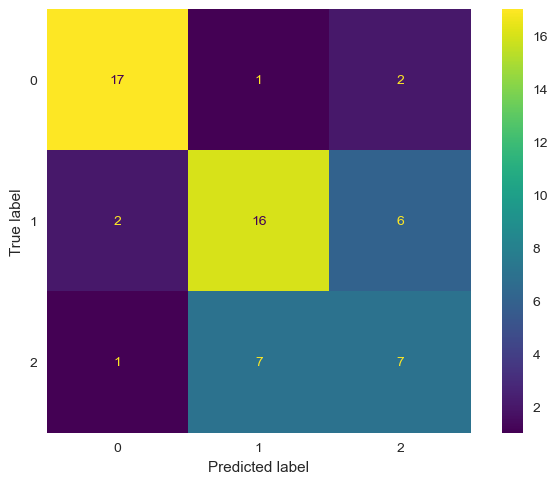

In [497]:
cm=confusion_matrix(y_test,y_pred_knn,labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
print('              \033[1mConfusion Matrix of K Nearest Neighbours\033[0m')
disp.plot()
plt.grid(False)
plt.show()

In [498]:
print("\033[1mThe classification report of K Nearest Neighbours Classification is:\n\n------------------Classification Report------------------\033[0m\n",classification_report(y_test, y_pred_knn))

The classification report of K Nearest Neighbours Classification is:

------------------Classification Report------------------
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.67      0.67      0.67        24
           2       0.47      0.47      0.47        15

    accuracy                           0.68        59
   macro avg       0.66      0.66      0.66        59
weighted avg       0.68      0.68      0.68        59



In [499]:
print("\033[1mThe Balanced accuracy score obtained using K Nearest Neighbours\033[0m is:\033[1m", balanced_accuracy_score(y_test, y_pred_knn))

The Balanced accuracy score obtained using K Nearest Neighbours is: 0.6611111111111111


### K Nearest Neighbours with Standard Scaler and PCA

In [500]:
x_pca = PCA(n_components=7).fit_transform(sclr.fit_transform(X))

In [501]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, Y, test_size=0.33, random_state=42)

In [502]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

#### Cross validate and measure the scores and calculate the mean accuracy of the model

In [503]:
score = cross_val_score(knn, x_train, y_train, cv = cv, scoring='accuracy')

In [504]:
y_pred_knn_pca_sclr = knn.predict(x_test)

In [505]:
print("The mean accuracy obtained using KNN with Standard Scaler and PCA is: ",score.mean())

The mean accuracy obtained using KNN with Standard Scaler and PCA is:  0.9494047619047619


In [506]:
score

array([0.93333333, 1.        , 0.93333333, 0.93333333, 0.86666667,
       1.        , 1.        , 0.92857143])

#### Let's plot the ROC-AUC curves, display the confusion matrix and print the classification report which displays the Precision, recall and the F1-score to evaluate the model. The subsequent cells represent the balanced accuracy score for the particular model [2]


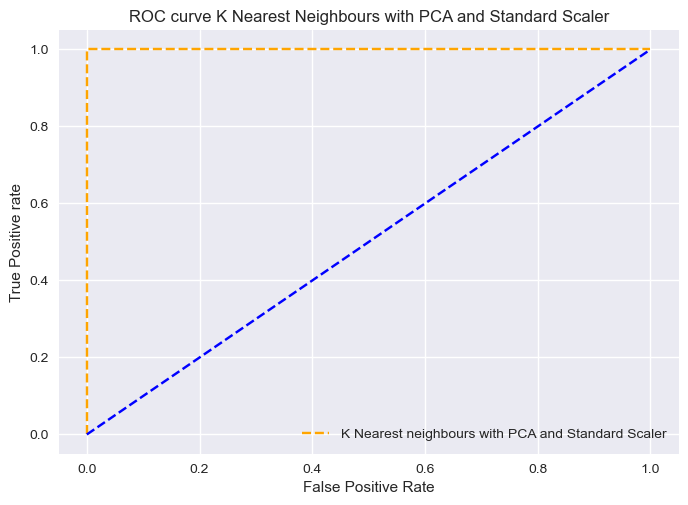

In [507]:
# [2]
probs = knn.predict_proba(x_test)

fpr1_knn_pca_sclr, tpr1_knn_pca_sclr, thresh1_svc = roc_curve(y_test, probs[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr_knn_pca_sclr, p_tpr_knn_pca_sclr, _ = roc_curve(y_test, random_probs, pos_label=1)

##matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_knn_pca_sclr, tpr1_knn_pca_sclr, linestyle='--',color='orange', label='K Nearest neighbours with PCA and Standard Scaler')
plt.plot(p_fpr_knn_pca_sclr, p_tpr_knn_pca_sclr, linestyle='--', color='blue')
# title
plt.title('ROC curve K Nearest Neighbours with PCA and Standard Scaler')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

#### ROC AUC score

In [508]:
print('the ROC-AUC score of KNN with PCA and Standard Scaler', roc_auc_score(y_test, knn.predict_proba(x_test), multi_class='ovr'))

the ROC-AUC score of KNN with PCA and Standard Scaler 1.0


         Confusion Matrix of K Nearest Neighbours with PCA and Standard Scaler


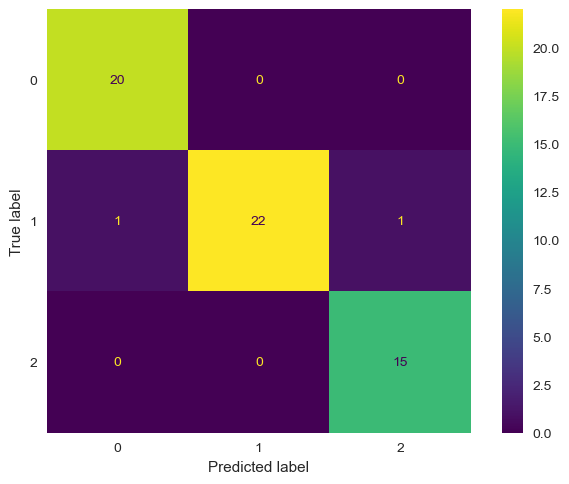

In [509]:
cm=confusion_matrix(y_test,y_pred_knn_pca_sclr,labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
print('         \033[1mConfusion Matrix of K Nearest Neighbours with PCA and Standard Scaler\033[0m')
disp.plot()
plt.grid(False)
plt.show()

In [510]:
print("\033[1mThe classification report of K Nearest Neighbours with Standard Scaler and PCA is:\n\n------------------Classification Report------------------\033[0m\n",classification_report(y_test, y_pred_knn_pca_sclr))

The classification report of K Nearest Neighbours with Standard Scaler and PCA is:

------------------Classification Report------------------
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.92      0.96        24
           2       0.94      1.00      0.97        15

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



In [511]:
print("\033[1mThe Balanced accuracy score obtained using K Nearest Neighbours with Standard Scaler and PCA\033[0m is:\033[1m", balanced_accuracy_score(y_test, y_pred_knn_pca_sclr))

The Balanced accuracy score obtained using K Nearest Neighbours with Standard Scaler and PCA is: 0.9722222222222222


# Ada Boost Classifier [11]

In [512]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
ada_boost = AdaBoostClassifier(n_estimators=100)
ada_boost.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100)

#### Cross validate and measure the scores and calculate the mean accuracy of the model

In [513]:
cross_val_score(ada_boost, X, Y, cv=cv, scoring='accuracy')

array([0.86956522, 0.73913043, 0.90909091, 0.72727273, 0.95454545,
       0.95454545, 0.81818182, 0.81818182])

In [514]:
y_pred_ada = ada_boost.predict(x_test)

In [515]:
print("The accuracy obtained using Ada Boost classifier is: ",accuracy_score(y_test,y_pred_ada))

The accuracy obtained using Ada Boost classifier is:  0.9152542372881356


#### Let's plot the ROC-AUC curves, display the confusion matrix and print the classification report which displays the Precision, recall and the F1-score to evaluate the model. The subsequent cells represent the balanced accuracy score for the particular model [2]


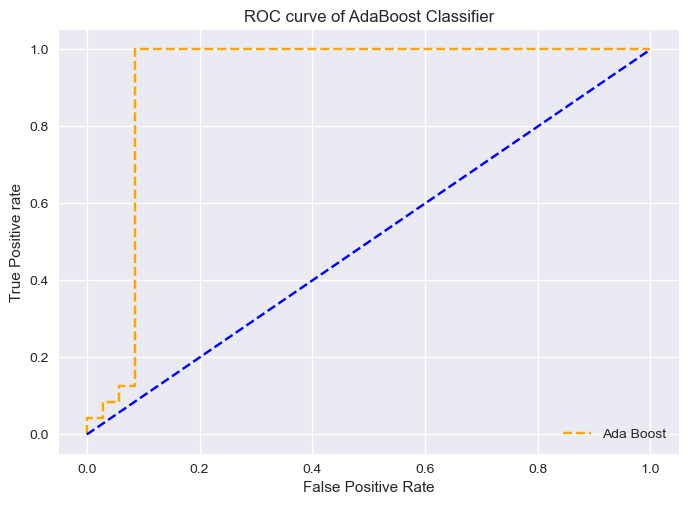

In [516]:
# [2]
probs = ada_boost.predict_proba(x_test)

fpr1_ada, tpr1_ada, thresh1_svc = roc_curve(y_test, probs[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr_ada, p_tpr_ada, _ = roc_curve(y_test, random_probs, pos_label=1)

##matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_ada, tpr1_ada, linestyle='--',color='orange', label='Ada Boost')
plt.plot(p_fpr_ada, p_tpr_ada, linestyle='--', color='blue')
# title
plt.title('ROC curve of AdaBoost Classifier')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

#### ROC AUC score

In [517]:
print('the ROC-AUC score of Ada Boost Classifer', roc_auc_score(y_test, ada_boost.predict_proba(x_test), multi_class='ovr'))

the ROC-AUC score of Ada Boost Classifer 0.9738095238095238


              Confusion Matrix of AdaBoost Classifier


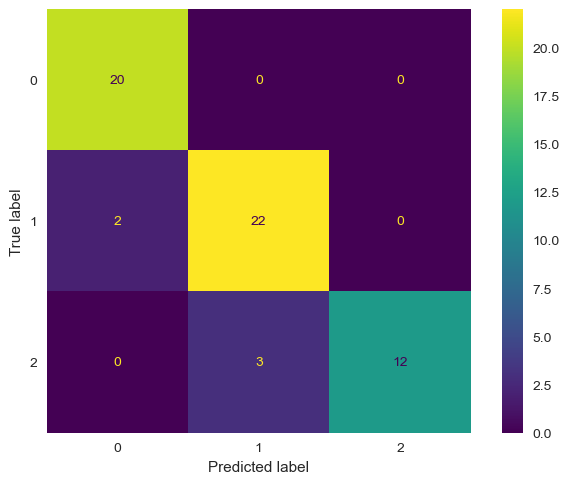

In [518]:
cm=confusion_matrix(y_test,y_pred_ada,labels=ada_boost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ada_boost.classes_)
print('              \033[1mConfusion Matrix of AdaBoost Classifier\033[0m')
disp.plot()
plt.grid(False)
plt.show()

In [519]:
print("\033[1mThe classification report of AdaBoost Classifier is:\n\n------------------Classification Report------------------\033[0m\n",classification_report(y_test, y_pred_ada))

The classification report of AdaBoost Classifier is:

------------------Classification Report------------------
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       0.88      0.92      0.90        24
           2       1.00      0.80      0.89        15

    accuracy                           0.92        59
   macro avg       0.93      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59



In [520]:
print("\033[1mThe Balanced accuracy score obtained using AdaBoost Classifier\033[0m is:\033[1m", balanced_accuracy_score(y_test, y_pred_ada))

The Balanced accuracy score obtained using AdaBoost Classifier is: 0.9055555555555556


### Ada Boost with Standard Scaler and PCA

#### Cross validate and measure the scores and calculate the mean accuracy of the model

In [521]:
sclr = StandardScaler()
x_transform = sclr.fit_transform(X)
x_pca = PCA(n_components=7).fit_transform(sclr.fit_transform(X))
x_train, x_test, y_train, y_test = train_test_split(x_pca,Y,test_size=0.33,random_state=42)
ada_boost.fit(x_train,y_train)
scores = cross_val_score(ada_boost, x_train, y_train, cv=cv, scoring='accuracy')
y_pred_ada_sclr_pca = ada_boost.predict(x_test)

#### Let's plot the ROC-AUC curves, display the confusion matrix and print the classification report which displays the Precision, recall and the F1-score to evaluate the model. The subsequent cells represent the balanced accuracy score for the particular model [2]


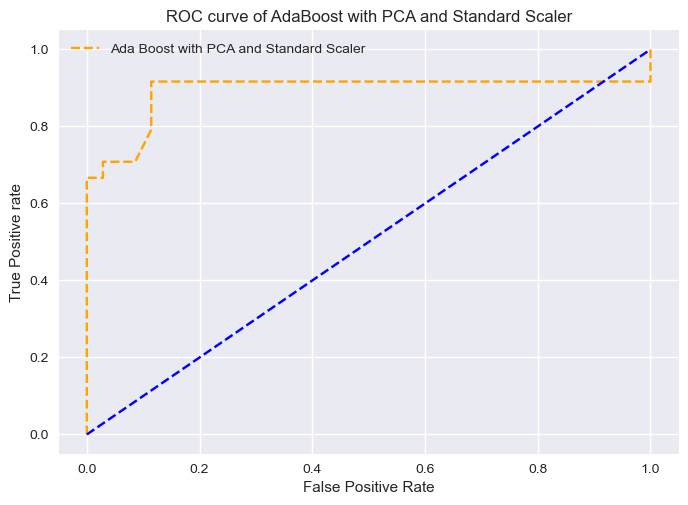

In [522]:
# [2]
probs = ada_boost.predict_proba(x_test)

fpr1_ada_sclr_pca, tpr1_ada_sclr_pca, thresh1_svc = roc_curve(y_test, probs[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr_ada_sclr_pca, p_tpr_ada_sclr_pca, _ = roc_curve(y_test, random_probs, pos_label=1)

##matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1_ada_sclr_pca, tpr1_ada_sclr_pca, linestyle='--',color='orange', label='Ada Boost with PCA and Standard Scaler')
plt.plot(p_fpr_ada_sclr_pca, p_tpr_ada_sclr_pca, linestyle='--', color='blue')
# title
plt.title('ROC curve of AdaBoost with PCA and Standard Scaler')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

#### ROC AUC score

In [523]:
print('the ROC-AUC score of Ada Boost with PCA and Standard Scaler', roc_auc_score(y_test, ada_boost.predict_proba(x_test), multi_class='ovr'))

the ROC-AUC score of Ada Boost with PCA and Standard Scaler 0.9335164835164834


         Confusion Matrix of AdaBoost with PCA and Standard Scaler


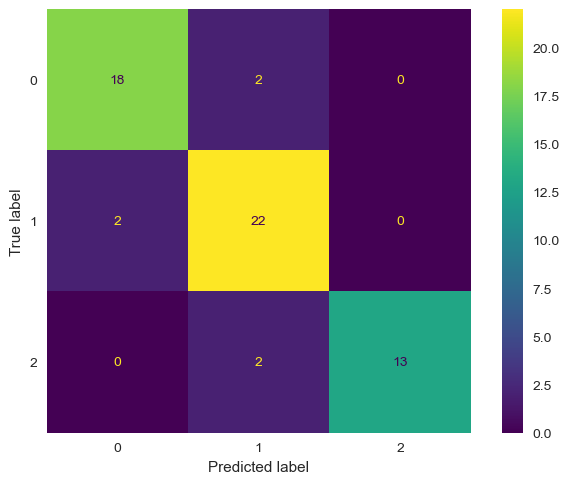

In [524]:
cm=confusion_matrix(y_test,y_pred_ada_sclr_pca,labels=ada_boost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ada_boost.classes_)
print('         \033[1mConfusion Matrix of AdaBoost with PCA and Standard Scaler\033[0m')
disp.plot()
plt.grid(False)
plt.show()

In [525]:
print("\033[1mThe classification report of AdaBoost with PCA and Standard Scaler is:\n\n------------------Classification Report------------------\033[0m\n",classification_report(y_test, y_pred_ada_sclr_pca))

The classification report of AdaBoost with PCA and Standard Scaler is:

------------------Classification Report------------------
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.85      0.92      0.88        24
           2       1.00      0.87      0.93        15

    accuracy                           0.90        59
   macro avg       0.92      0.89      0.90        59
weighted avg       0.90      0.90      0.90        59



In [526]:
print("\033[1mThe Balanced accuracy score obtained using AdaBoost Classifier\033[0m is:\033[1m", balanced_accuracy_score(y_test, y_pred_ada_sclr_pca))

The Balanced accuracy score obtained using AdaBoost Classifier is: 0.8944444444444445


## Plotting all the ROC and AUC curves in the same graph to get an overview of every model used [2]

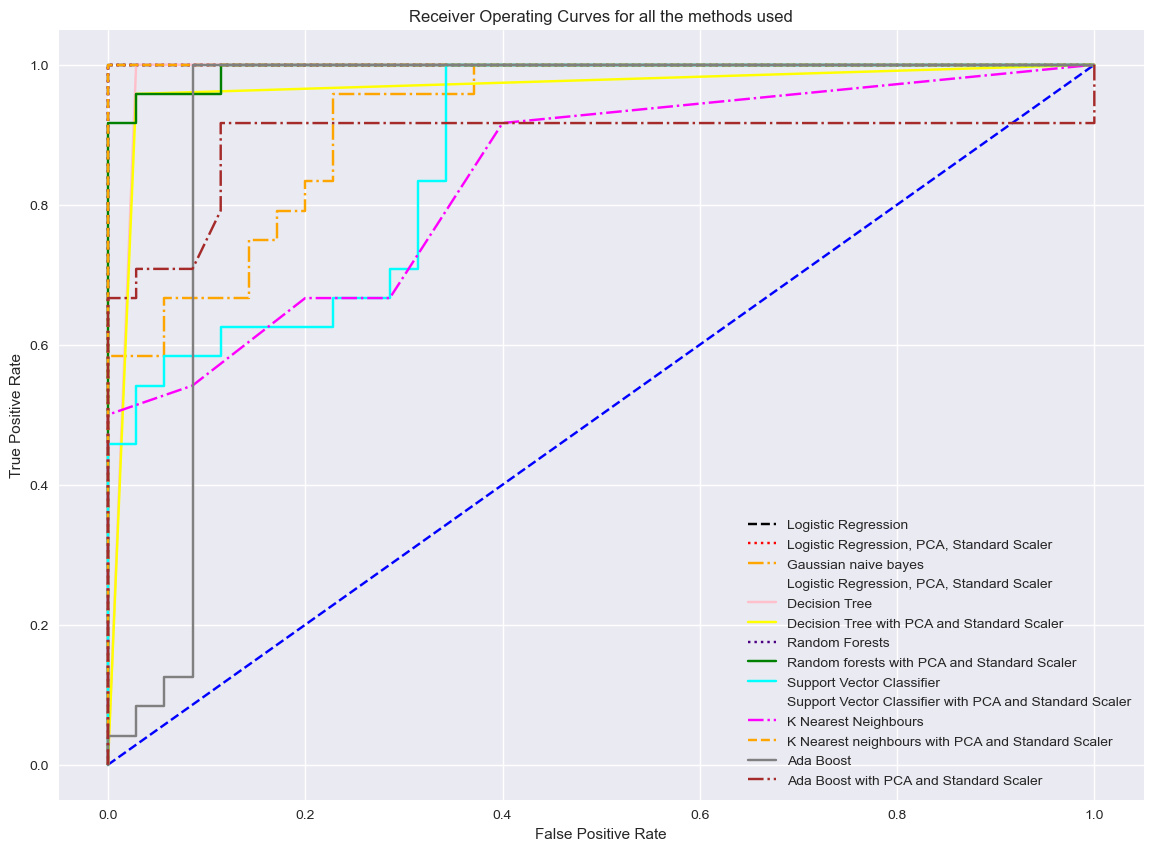

In [527]:
##supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
plt.figure(figsize=(14,10))

#reference line
plt.plot(p_fpr_full, p_tpr_full, linestyle='--', color='blue')

#logistic regression with Kfold
plt.plot(fpr1_full, tpr1_full, linestyle='--', color='black', label='Logistic Regression')

#logistic regression without kfold
plt.plot(fpr1_lr_pca_sclr, tpr1_lr_pca_sclr, linestyle=':', color='red', label='Logistic Regression, PCA, Standard Scaler')

#gaussian naive bayes
plt.plot(fpr1_gnb, tpr1_gnb, linestyle='-.',color='orange', label='Gaussian naive bayes')

#logistic regression with standard scaler and PCA
plt.plot(fpr1_lr_pca_sclr, tpr1_lr_pca_sclr, linestyle='None', color='violet', label='Logistic Regression, PCA, Standard Scaler')

#Decision Tree
plt.plot(fpr1_dt, tpr1_dt, linestyle='solid',color='pink', label='Decision Tree')

#Decision Tree with Scaler and PCA
plt.plot(fpr1_dt_sclr_pca, tpr1_dt_sclr_pca, linestyle='solid',color='yellow', label='Decision Tree with PCA and Standard Scaler')

#Random Forest
plt.plot(fpr1_rf, tpr1_rf, linestyle=':',color='indigo', label='Random Forests')

#Random Forest with PCA and Standard Scaler
plt.plot(fpr1_rf_sclr_pca, tpr1_rf_sclr_pca, linestyle='-',color='green', label='Random forests with PCA and Standard Scaler')

#SVC 
plt.plot(fpr1_svc, tpr1_svc, linestyle='solid',color='cyan', label='Support Vector Classifier')

#SVC with standard scaler and PCA
plt.plot(fpr1_svc_pca_sclr, tpr1_svc_pca_sclr, linestyle=' ',color='indigo', label='Support Vector Classifier with PCA and Standard Scaler')

#KNN
plt.plot(fpr1_knn, tpr1_knn, linestyle='-.',color='magenta', label='K Nearest Neighbours')

#KNN with standard scaler and PCA
plt.plot(fpr1_knn_pca_sclr, tpr1_knn_pca_sclr, linestyle='--',color='orange', label='K Nearest neighbours with PCA and Standard Scaler')

#AdaBoost
plt.plot(fpr1_ada, tpr1_ada, linestyle='-',color='gray', label='Ada Boost')

#AdaBoost with Standard Scaler and PCA
plt.plot(fpr1_ada_sclr_pca, tpr1_ada_sclr_pca, linestyle='-.',color='brown', label='Ada Boost with PCA and Standard Scaler')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('Receiver Operating Curves for all the methods used')
plt.show()

# References

#### [1]  MachineLearningMastery.com, 'How to configure k-fold cross-validation' [online].
#### Available: https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/ . [Accessed 13-Feb-2023].

#### [2] analyticsvidhya.com, 'Guide to AUC ROC Curve in Machine Learning : What Is Specificity?'
#### Available: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/ . [Accessed 18-Feb-2023].

#### [3] wellsr.com, 'Python Agglomerative Clustering with sklearn'
#### Available: https://wellsr.com/python/python-agglomerative-clustering-with-sklearn/ . [Accessed 8-Feb-2023]

#### [4] towardsdatascience.com, 'Visualizing Clusters with Python’s Matplotlib' 
#### Available: https://towardsdatascience.com/visualizing-clusters-with-pythons-matplolib-35ae03d87489 . [Accessed 8-Feb-2023]

#### [5] scikit-learn.org, ' DBSCAN'
#### Available: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html .  [Accessed on 15-Feb-2023]
#### [6] scikit-learn.org, ' Birch'
#### Available:  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html . [Accessed on 15-Feb-2023]
#### [7] scikit-learn.org, ' AffinityPropagation'
#### Available:  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html . [Accessed on 16-Feb-2023]
#### [8] scikit-learn.org, 'MeanShift'
####  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html .  [Accessed on 17-Feb-2023]

#### [9] scikit-learn.org, 'gaussian-naive-bayes'
#### Available: https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes . [Accessed on 18-Feb-2023]
#### [10]  scikit-learn.org, 'KNeighborsClassifier'
#### Available: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html . [Accessed on 18-Feb-2023]
#### [11] scikit-learn.org, 'AdaBoostClassifier'
#### Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html .[Accessed on 19-Feb-2023]